<a href="https://colab.research.google.com/github/PhilR1127/Data-699/blob/main/BMI_VERSION_3_28_24__DONT_CHANGE_FOR_SUBMISSION_Predicting__Risk__of_Near_Term__Mortality_Post_Hosp_Discharge__Update_2_28_24_Data_606__with_30_and_60_Day_Outcomes_By_Race_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
## 2_28 - Look at caucasian (race category 1) and hispanic/lation (race category 3)... in addition to african- american/black (category 2)
# 2_24 Look at 30 and 60 day outpatient deaths outcomes in addition to One year (also add 6 months)
## 2-22 -24  - Not having success with newer models using categorical data (gender, age, and race).... will reeval around two main columns
## 1) Length of Stay (convert first to an integer column and then to a category), and
## 2) Date of Death (convert this to a new target outcome ... and see if can improve accuracy of model by using shorter timeframes ... 30 days, 90 days, 180 days etc )
## also need to switch "0" and "1" in current target vairable column of "Survival"... change to "Outpatient Death" and
## set minority class (death) outcome to "1"... with majority class outcome (living) to "0"... conventional binary classification modeling.

In [3]:
##df=pd.read_csv(r"C:\Users\robil\Documents\Data 699\data699_final_patient_file_v2_with avg_BMI .csv")
## 2-22-24 update ... using D606 1_18_24 csv file
## 3-28-24 update .... using D606 3_4_24 with BMI csv file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Data For D606 3_4_24 with BMI.csv to Data For D606 3_4_24 with BMI.csv


In [5]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Data For D606 3_4_24 with BMI.csv']))
# Dataset is now stored in a Pandas Dataframe

<ipython-input-5-8972f451c1eb>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(io.BytesIO(uploaded['Data For D606 3_4_24 with BMI.csv']))


In [6]:
## df2 = BMI csv file

In [7]:
print(df2)

       subject_id  age_patient date_of_death  inptdeath             atime  \
0        18179783           86     1/22/2212          0   4/30/2208 16:47   
1        11756261           62     1/14/2212          0   10/12/2201 8:45   
2        16477638           61     9/16/2211          0   10/9/2210 14:33   
3        13774741           91     2/27/2211          0  10/26/2210 20:21   
4        12844772           58     1/17/2211          1   1/14/2211 13:14   
...           ...          ...           ...        ...               ...   
88341    15907631           18           NaN          0     8/4/2189 6:55   
88342    17027269           18           NaN          0   10/4/2189 17:28   
88343    17946600           18           NaN          0   7/19/2189 21:00   
88344    19531581           18           NaN          0   8/17/2196 18:40   
88345    14332783           18           NaN          0   5/15/2201 20:10   

                  dtime     avg_HR     avg_sbp    avg_dbp   avg_O2sat  \
0 

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       88346 non-null  int64  
 1   age_patient      88346 non-null  int64  
 2   date_of_death    13183 non-null  object 
 3   inptdeath        88346 non-null  int64  
 4   atime            88346 non-null  object 
 5   dtime            88346 non-null  object 
 6   avg_HR           88172 non-null  float64
 7   avg_sbp          88159 non-null  float64
 8   avg_dbp          88159 non-null  float64
 9   avg_O2sat        87509 non-null  float64
 10  avg_BMI          88346 non-null  float64
 11  race_category    88346 non-null  int64  
 12  gender_category  88346 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 8.8+ MB


In [9]:
##Begin Exploration of Dataset, Tranforamtion and EDA:
##Would like to evaluate Length of Stay ... in order to calulate will need subtract discharge time (dtime)
## from admission time (atime)
## Use pd.to_datetime() to change :

df2['atime'] = pd.to_datetime(df2['atime'])

In [10]:
df2['dtime'] =pd.to_datetime(df2['dtime'])

In [11]:
## also need to convert 'date_of_death' to datetime
## Plan to use this to generate the independant variable for the  model ("outpatient_death")

In [12]:
df2['date_of_death'] =pd.to_datetime(df2['date_of_death'])

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   subject_id       88346 non-null  int64         
 1   age_patient      88346 non-null  int64         
 2   date_of_death    13183 non-null  datetime64[ns]
 3   inptdeath        88346 non-null  int64         
 4   atime            88346 non-null  datetime64[ns]
 5   dtime            88346 non-null  datetime64[ns]
 6   avg_HR           88172 non-null  float64       
 7   avg_sbp          88159 non-null  float64       
 8   avg_dbp          88159 non-null  float64       
 9   avg_O2sat        87509 non-null  float64       
 10  avg_BMI          88346 non-null  float64       
 11  race_category    88346 non-null  int64         
 12  gender_category  88346 non-null  int64         
dtypes: datetime64[ns](3), float64(5), int64(5)
memory usage: 8.8 MB


In [14]:
## all categories now currently integer or datetime

In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,88346.0,1.501822e+07,2.886864e+06,10000032.0,12508720.25,1.503559e+07,1.752156e+07,1.999983e+07
age_patient,88346.0,5.609865e+01,1.935801e+01,18.0,41.00,5.800000e+01,7.100000e+01,9.100000e+01
inptdeath,88346.0,3.457995e-02,1.827144e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
avg_HR,88172.0,8.057607e+01,1.375834e+01,7.0,71.00,7.945455e+01,8.888235e+01,1.979091e+02
avg_sbp,88159.0,1.290610e+02,1.703495e+01,11.0,117.00,1.276667e+02,1.393363e+02,2.930000e+02
avg_dbp,88159.0,7.483373e+01,1.062748e+02,6.0,66.00,7.288235e+01,8.000000e+01,2.602850e+04
avg_O2sat,87509.0,9.788668e+01,2.514594e+00,0.0,97.00,9.811111e+01,9.900000e+01,3.956667e+02
avg_BMI,88346.0,3.336802e+01,3.834796e+02,0.0,23.80,2.740000e+01,3.200000e+01,1.078402e+05
race_category,88346.0,1.919895e+00,1.454749e+00,1.0,1.00,1.000000e+00,2.000000e+00,5.000000e+00
gender_category,88346.0,1.555950e+00,4.968625e-01,1.0,1.00,2.000000e+00,2.000000e+00,2.000000e+00


In [16]:
import numpy as np

In [17]:
## Original Hypothesis for D699 was  Markers associated with CRF and/or decreased morbidity in short term or long term studies can be used to predict near/moderate term risk of death (within 30 days or 60 days or
## one year of discharge from hospital)using MIMIC-IV dataset.
## (Quieried multiple tables in MIMIC-IV Hospital and ED Datasets to create this dataset)
## Would initially like to evaluate measures of cardiovascular health and their potential impact on near term outpatient death INDEPENDANT of sex,race and medical diagnosis.. to see how accurate of a model I can build
## Need to add new variables and transform existing ones: (Est VO2_Max, Pulse_Pressure, Oxygen (O2)_Saturation and BMI)

In [18]:
df2['avg_O2sat'] = pd.to_numeric(df2['avg_O2sat'])

In [19]:
df2['avg_HR'] = pd.to_numeric(df2['avg_HR'])

In [19]:
##Create three new variables:
#1. Pulse Pressure (https://www.ahajournals.org/doi/10.1161/hy1001.092966)
#2.Maximum Heart Rate (which is calculated based on age of patient, and will be used to calculate:
#3.Estimated Vo2 Max (https://pubmed.ncbi.nlm.nih.gov/29293447/, https://pubmed.ncbi.nlm.nih.gov/30139444/)
## Hypothesis is that vO2_Max (long term) Pulse_Pressure, and O2Sat (Acute) all seem to impact either acute or
##long term health/morbidity/mortality... evaluating on this dataset for death within one year (short term mortality)

In [20]:
df2['max_HR'] = (208-(df2['age_patient']))

In [21]:
## Simple formula for Pulse Pressure... Systolic Blood Pressure - Diastolic Blood Pressure
df2['pulse_pressure'] = (df2['avg_sbp'])-(df2['avg_dbp'])

In [22]:
## formula for calculating Estimated vO2 Max:
df2['est_vO2_max'] = (df2['max_HR'])/(df2['avg_HR'])*15.3

In [23]:
#Create three additional time related variables... for this 2_22_24 update
## interested to see if length of stay in particular has impact on risk of death within one year post discharge
#1. Length of Stay
#2. Time to Patient Death post Discharge

In [24]:
df2['length_of_stay']=((df2['dtime'])-(df2['atime']))

In [25]:
df2['time_to_outpatient_death'] = ((df2['date_of_death'])-df2['dtime'])

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88172 non-null  float64        
 7   avg_sbp                   88159 non-null  float64        
 8   avg_dbp                   88159 non-null  float64        
 9   avg_O2sat                 87509 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [27]:
## confirm that all of the patients (subject_id) are only entered one time and are not duplicated.. should get N= 88346 for df2 (with BMI)
df2.nunique()

subject_id                  88346
age_patient                    73
date_of_death               10823
inptdeath                       2
atime                       88041
dtime                       87877
avg_HR                      14206
avg_sbp                     15207
avg_dbp                     12802
avg_O2sat                    5041
avg_BMI                     24024
race_category                   5
gender_category                 2
max_HR                         73
pulse_pressure              29237
est_vO2_max                 53540
length_of_stay              19409
time_to_outpatient_death     9978
dtype: int64

In [28]:
df2['time_to_outpatient_death'].value_counts()

0 days 00:00:00      191
-1 days +09:00:00     32
-1 days +05:30:00     26
-1 days +13:00:00     24
-1 days +20:00:00     22
                    ... 
3 days 13:20:00        1
23 days 10:50:00       1
5 days 04:20:00        1
18 days 09:45:00       1
38 days 10:44:00       1
Name: time_to_outpatient_death, Length: 9978, dtype: int64

In [29]:
df2['length_of_stay'].value_counts()

1 days 16:30:00     36
1 days 16:00:00     34
0 days 21:35:00     34
0 days 19:42:00     33
1 days 04:30:00     32
                    ..
8 days 23:01:00      1
14 days 14:12:00     1
16 days 11:33:00     1
12 days 07:53:00     1
13 days 13:05:00     1
Name: length_of_stay, Length: 19409, dtype: int64

In [30]:
df2.head(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,19.791304,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,27.566667,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,24.066667,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00


In [31]:
df2.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
88343,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.0,126.0,75.00,98.0,47.700000,5,2,190,51.00,31.597826,6 days 17:30:00,NaT
88344,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.20,99.6,25.250000,2,2,190,38.40,30.600000,2 days 17:16:00,NaT
88345,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.25,100.0,23.914286,2,2,190,41.25,39.283784,2 days 19:00:00,NaT


In [32]:
df2.describe()

,subject_id,age_patient,inptdeath,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death
count,8.834600e+04,88346.000000,88346.000000,88172.000000,88159.000000,88159.000000,87509.000000,88346.000000,88346.000000,88346.000000,88346.000000,88159.000000,88172.000000,88346,13183
mean,1.501822e+07,56.098646,0.034580,80.576066,129.061020,74.833727,97.886679,33.368016,1.919895,1.555950,151.901354,54.227293,29.627053,4 days 11:35:34.671858375,98 days 04:28:01.024046120
std,2.886864e+06,19.358011,0.182714,13.758338,17.034953,106.274759,2.514594,383.479599,1.454749,0.496862,19.358011,106.967739,6.226077,6 days 14:47:22.475125830,191 days 17:59:30.672597162
min,1.000003e+07,18.000000,0.000000,7.000000,11.000000,6.000000,0.000000,0.000000,1.000000,1.000000,117.000000,-25925.000000,11.444400,-1 days +03:10:00,-2172 days +06:30:00
25%,1.250872e+07,41.000000,0.000000,71.000000,117.000000,66.000000,97.000000,23.800000,1.000000,1.000000,137.000000,45.571429,25.375610,1 days 06:24:00,0 days 10:37:30
50%,1.503559e+07,58.000000,0.000000,79.454545,127.666667,72.882353,98.111111,27.400000,1.000000,2.000000,150.000000,53.400000,29.098918,2 days 17:57:00,32 days 06:20:00
75%,1.752156e+07,71.000000,0.000000,88.882353,139.336309,80.000000,99.000000,32.000000,2.000000,2.000000,167.000000,63.777778,33.264820,5 days 01:36:45,138 days 08:33:00
max,1.999983e+07,91.000000,1.000000,197.909091,293.000000,26028.500000,395.666667,107840.200000,5.000000,2.000000,190.000000,221.000000,340.971429,220 days 00:23:00,3901 days 20:30:00


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88172 non-null  float64        
 7   avg_sbp                   88159 non-null  float64        
 8   avg_dbp                   88159 non-null  float64        
 9   avg_O2sat                 87509 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [34]:
#Now need to clean the data/columns that I will be using in the models (remove or transform missing from tables of interest, and need to set up a target variable
##to run initial model - a logistic regression on a new variable called "Survival" (1 = patients that died either
##during admission or within one year of discharge,,,and 0 = patients that survived)

In [35]:
## check for null and not null values, focus on Date of Death (which appears to include both dates of inpatient and outpatient deaths)
df2.notnull().sum()

subject_id                  88346
age_patient                 88346
date_of_death               13183
inptdeath                   88346
atime                       88346
dtime                       88346
avg_HR                      88172
avg_sbp                     88159
avg_dbp                     88159
avg_O2sat                   87509
avg_BMI                     88346
race_category               88346
gender_category             88346
max_HR                      88346
pulse_pressure              88159
est_vO2_max                 88172
length_of_stay              88346
time_to_outpatient_death    13183
dtype: int64

In [36]:
df2.isnull().sum()

subject_id                      0
age_patient                     0
date_of_death               75163
inptdeath                       0
atime                           0
dtime                           0
avg_HR                        174
avg_sbp                       187
avg_dbp                       187
avg_O2sat                     837
avg_BMI                         0
race_category                   0
gender_category                 0
max_HR                          0
pulse_pressure                187
est_vO2_max                   174
length_of_stay                  0
time_to_outpatient_death    75163
dtype: int64

In [37]:
##Comparing "isnull_sum" variable counts to "notnull.sum() varaible counts shows that I will need to:
## 3_28_24 UPDATE For BMI DATA
#1- either remove or normalize the small number of Null values in the AVG_HR,
#AVG_SBP, AVG_DBP, AVG_O2SAT, and AVG_Pulse_Pressure... since these are all fairly small numbers of missing rows
#(~500 to 1900) compared to the total number of patients of 119,357 in the dataframe of ... I am just going to set
##each of these missing values equal to the mean for that particlular variable.

#2 - Set "Date of Death" to the dependant varaible for logisitic regression (as a new variable "Survival")
##There are 17,676 NOT-Null values in this column... these would correspond to a death event.. either inpatient or outpatient
##(Set "death" = 0)
#There are 101,681 Null values in this column ... these would correspond to a patient living one year post discharge
##(Set "survival" = 1)

In [38]:
##If data in a column is actually missing, can use fillna() method... ie results['AVG_SBP']fillna(128.253461) ...
##fill with the mean of AVG_SBP.

##Then check transformed ['AVG_SBP] using results['AVG_SBP'].value_counts(dropna= false)...
##should see this 128.253461 show up 532 times (532 represents null though, not missing... need to doublecheck this)

##once have all columns fixed for missing data, can apply results.hist(figsize =20,20) to look at outliers:

##For target variable "Date_Of_Death" will need to change title to Survival and make 0 = death and 1 = survival....
##so change all the null values to "1":

## Because Avg_BMI has so many null values (31011).. I am going to leave out of initial regression model and
## address in Model #2 (eventually put this in Notebook 2)
## THIS CURRENT NOTEBOOK CONTAINS THE DATA ON BMI


In [39]:
df2['avg_HR']=df2['avg_HR'].fillna(80.576066)
df2['avg_sbp']=df2['avg_sbp'].fillna(129.061020)
df2['avg_dbp']=df2['avg_dbp'].fillna(74.833727)
df2['avg_O2sat']=df2['avg_O2sat'].fillna(97.886679)
df2['pulse_pressure']=df2['pulse_pressure'].fillna(54.227293)
df2['est_vO2_max']=df2['est_vO2_max'].fillna(29.627053)

In [41]:
## check we've transformed the nulls to the means for these columns
df2.isnull().sum()

subject_id                      0
age_patient                     0
date_of_death               75163
inptdeath                       0
atime                           0
dtime                           0
avg_HR                          0
avg_sbp                         0
avg_dbp                         0
avg_O2sat                       0
avg_BMI                         0
race_category                   0
gender_category                 0
max_HR                          0
pulse_pressure                  0
est_vO2_max                     0
length_of_stay                  0
time_to_outpatient_death    75163
dtype: int64

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'age_patient'}>,
        <Axes: title={'center': 'date_of_death'}>,
        <Axes: title={'center': 'inptdeath'}>],
       [<Axes: title={'center': 'atime'}>,
        <Axes: title={'center': 'dtime'}>,
        <Axes: title={'center': 'avg_HR'}>,
        <Axes: title={'center': 'avg_sbp'}>],
       [<Axes: title={'center': 'avg_dbp'}>,
        <Axes: title={'center': 'avg_O2sat'}>,
        <Axes: title={'center': 'avg_BMI'}>,
        <Axes: title={'center': 'race_category'}>],
       [<Axes: title={'center': 'gender_category'}>,
        <Axes: title={'center': 'max_HR'}>,
        <Axes: title={'center': 'pulse_pressure'}>,
        <Axes: title={'center': 'est_vO2_max'}>]], dtype=object)

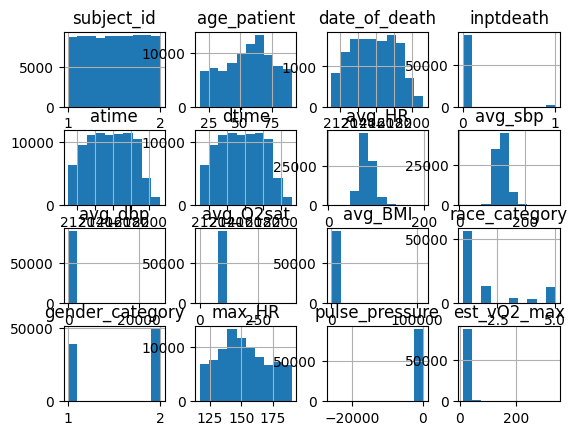

In [42]:
df2.hist()

In [43]:
## 3-29-24 SKIP AGE SUBSET ANALYSIS FOR NOW
## will have to remove outliers for Est_vO2_Max for initial binary logistic regression...
##and then other columns for multiple variable

In [ ]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset .. patients are age 18 to 91 (anyone over age 91 is simply identified as being "91")

In [ ]:
## 2_22_24  Evaluate age groups later
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
## df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7])

In [ ]:
## First, will Need to convert the "date_of_death" datetime column to a new numeric column "outpatient_death"
# with only "0" for survival and "0" for oupatient deaths

In [44]:
##found this in stackoverflow ....if it works create new column
df2['date_of_death'].dt.strftime("%Y%m%d").astype(float)

0        22120122.0
1        22120114.0
2        22110916.0
3        22110227.0
4        22110117.0
            ...    
88341           NaN
88342           NaN
88343           NaN
88344           NaN
88345           NaN
Name: date_of_death, Length: 88346, dtype: float64

In [45]:
df2['outpatient_death'] = df2['date_of_death'].dt.strftime("%Y%m%d").astype(float)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88346 non-null  float64        
 7   avg_sbp                   88346 non-null  float64        
 8   avg_dbp                   88346 non-null  float64        
 9   avg_O2sat                 88346 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [47]:
df2.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
88343,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.0,126.0,75.00,98.0,47.700000,5,2,190,51.00,31.597826,6 days 17:30:00,NaT,NaN
88344,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.20,99.6,25.250000,2,2,190,38.40,30.600000,2 days 17:16:00,NaT,NaN
88345,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.25,100.0,23.914286,2,2,190,41.25,39.283784,2 days 19:00:00,NaT,NaN


In [48]:
df2['outpatient_death']=pd.to_numeric(df2['outpatient_death'])

In [49]:
df2.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
88343,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.0,126.0,75.00,98.0,47.700000,5,2,190,51.00,31.597826,6 days 17:30:00,NaT,NaN
88344,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.20,99.6,25.250000,2,2,190,38.40,30.600000,2 days 17:16:00,NaT,NaN
88345,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.25,100.0,23.914286,2,2,190,41.25,39.283784,2 days 19:00:00,NaT,NaN


In [50]:
df2['outpatient_death']=df2['outpatient_death'].fillna(0)

In [51]:
##Have set the Surviving patients to "0", now attempting to set the Deceased patients to "1" in Target Variable "outpatient_death"
df2['outpatient_death'][df2['outpatient_death']>0] = 1

<ipython-input-51-a7ea082c99fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death'][df2['outpatient_death']>0] = 1


In [52]:
df2['outpatient_death'].value_counts()

0.0    75163
1.0    13183
Name: outpatient_death, dtype: int64

In [82]:
##The value counts for '1" and '0' are correct,(75163 + 13183 = 88,346) so this seems to have worked despite the warning ....**

In [53]:
df2.head(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,19.791304,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00,1.0
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,27.566667,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00,1.0
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,24.066667,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00,1.0


In [54]:
df2.tail(3)

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
88343,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.0,126.0,75.00,98.0,47.700000,5,2,190,51.00,31.597826,6 days 17:30:00,NaT,0.0
88344,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.0,118.6,80.20,99.6,25.250000,2,2,190,38.40,30.600000,2 days 17:16:00,NaT,0.0
88345,14332783,18,NaT,0,2201-05-15 20:10:00,2201-05-18 15:10:00,74.0,103.5,62.25,100.0,23.914286,2,2,190,41.25,39.283784,2 days 19:00:00,NaT,0.0


In [ ]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset (Ages 18 and up)..
## I am assuming that increased age would be correlated with higher risk of death... so would like to stratify by age.

In [ ]:
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
##df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

In [55]:
df2

,subject_id,age_patient,date_of_death,inptdeath,atime,dtime,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
0,18179783,86,2212-01-22,0,2208-04-30 16:47:00,2208-05-03 14:22:00,75.377358,135.452830,68.943396,98.340909,19.791304,5,2,122,66.509434,24.763404,2 days 21:35:00,1358 days 09:38:00,1.0
1,11756261,62,2212-01-14,0,2201-10-12 08:45:00,2201-10-14 18:06:00,65.842105,139.055556,68.611111,98.842105,27.566667,2,1,146,70.444444,33.926619,2 days 09:21:00,3743 days 05:54:00,1.0
2,16477638,61,2211-09-16,0,2210-10-09 14:33:00,2210-10-11 15:05:00,75.705882,147.745098,67.725490,98.234043,24.066667,2,2,147,80.019608,29.708392,2 days 00:32:00,339 days 08:55:00,1.0
3,13774741,91,2211-02-27,0,2210-10-26 20:21:00,2210-10-30 12:30:00,86.903226,138.774193,74.677419,98.322581,24.900000,5,2,117,64.096774,20.598775,3 days 16:09:00,119 days 11:30:00,1.0
4,12844772,58,2211-01-17,1,2211-01-14 13:14:00,2211-01-17 12:34:00,68.500000,142.833333,77.000000,96.666667,29.400000,1,1,150,65.833333,33.503650,2 days 23:20:00,-1 days +11:26:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88341,15907631,18,NaT,0,2189-08-04 06:55:00,2189-08-17 20:00:00,95.125000,131.125000,77.125000,99.875000,38.100000,1,2,190,54.000000,30.559790,13 days 13:05:00,NaT,0.0
88342,17027269,18,NaT,0,2189-10-04 17:28:00,2189-10-12 18:00:00,62.500000,131.500000,88.000000,98.000000,25.600000,5,1,190,43.500000,46.512000,8 days 00:32:00,NaT,0.0
88343,17946600,18,NaT,0,2189-07-19 21:00:00,2189-07-26 14:30:00,92.000000,126.000000,75.000000,98.000000,47.700000,5,2,190,51.000000,31.597826,6 days 17:30:00,NaT,0.0
88344,19531581,18,NaT,0,2196-08-17 18:40:00,2196-08-20 11:56:00,95.000000,118.600000,80.200000,99.600000,25.250000,2,2,190,38.400000,30.600000,2 days 17:16:00,NaT,0.0


In [56]:
## Update 2_22_24 and 3_29_24: Cleaning all columns of interest for modeling
##Now get rid of outliers in the Est_Vo2 Max column since I want to focus on this variable first.
## NML Est_vO2_Max should range from from ~15/20 for very poorly conditioned
##older people to ~50-60 for very fit younger patients

<Axes: >

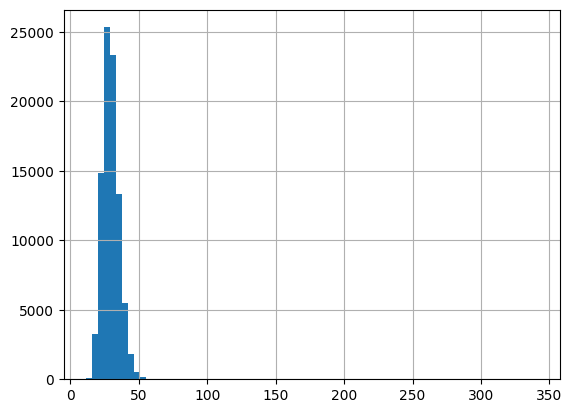

In [57]:
df2['est_vO2_max'].hist(bins=75)

In [58]:
df2['est_vO2_max'].describe()

count    88346.000000
mean        29.627053
std          6.219943
min         11.444400
25%         25.382511
50%         29.112947
75%         33.252914
max        340.971429
Name: est_vO2_max, dtype: float64

<Axes: >

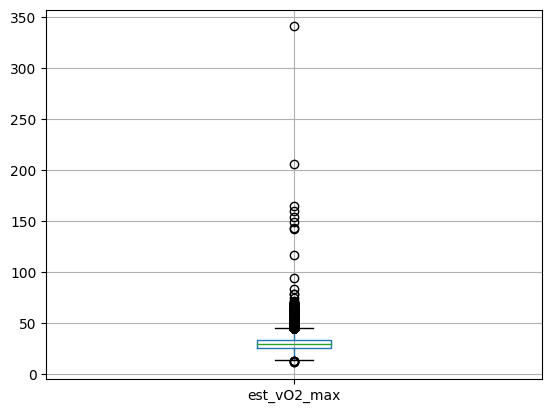

In [59]:
## there appears to be some unrelatistically high outliers:
df2.boxplot('est_vO2_max')

In [60]:
p99=df2['est_vO2_max'].quantile(0.99)
print(p99)

46.02978021978023


In [61]:
count =(df2['est_vO2_max'] > 60).sum()
print (count)

58


In [62]:
p995=df2['est_vO2_max'].quantile(0.995)
print(p995)

48.646153846153844


In [63]:
p999=df2['est_vO2_max'].quantile(0.999)
print(p999)

56.34534855985626


In [64]:
count =(df2['est_vO2_max'] > 50).sum()
print (count)

302


In [65]:
p50=df2['est_vO2_max'].quantile(0.50)
print(p50)

29.112946780043252


In [66]:
##going to go back and just resest the values greater than 99.5 percentile to the mean
df2.loc[df2['est_vO2_max']>p995,'est_vO2_max']=p50

In [67]:
##Was using this cap in my initial model, later decided to simply reset these outliers to the mean
##df.loc[df['Est_vO2_Max']>p995,'Est_vO2_Max']=p995


In [68]:
df2['est_vO2_max'].value_counts()

29.112947    441
30.600000    366
29.627053    174
38.250000    104
25.500000     83
            ... 
28.289160      1
24.596321      1
33.438462      1
27.982410      1
30.559790      1
Name: est_vO2_max, Length: 53166, dtype: int64

<Axes: >

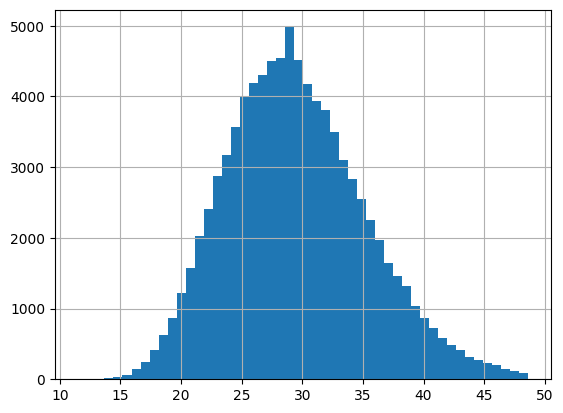

In [69]:
df2['est_vO2_max'].hist(bins=50)

In [70]:
## Histogram looks much better.. but I may want to remove these outliers instead of cap them..concerned re: the peak approaching 50
## (I ended up removing the cap and just setting the values >995 percentile to the mean)
##Will need to get rid of outliers for other columns of interest (pulse_pressure, length_Of_stay... etc)

##Will first look at an initial logistic regression **bold text**

In [71]:
df2['est_vO2_max'].value_counts()

29.112947    441
30.600000    366
29.627053    174
38.250000    104
25.500000     83
            ... 
28.289160      1
24.596321      1
33.438462      1
27.982410      1
30.559790      1
Name: est_vO2_max, Length: 53166, dtype: int64

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88346 non-null  float64        
 7   avg_sbp                   88346 non-null  float64        
 8   avg_dbp                   88346 non-null  float64        
 9   avg_O2sat                 88346 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [73]:
df2.describe()

,subject_id,age_patient,inptdeath,avg_HR,avg_sbp,avg_dbp,avg_O2sat,avg_BMI,race_category,gender_category,max_HR,pulse_pressure,est_vO2_max,length_of_stay,time_to_outpatient_death,outpatient_death
count,8.834600e+04,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346.000000,88346,13183,88346.000000
mean,1.501822e+07,56.098646,0.034580,80.576066,129.061020,74.833727,97.886679,33.368016,1.919895,1.555950,151.901354,54.227293,29.492671,4 days 11:35:34.671858375,98 days 04:28:01.024046120,0.149220
std,2.886864e+06,19.358011,0.182714,13.744783,17.016914,106.162224,2.502654,383.479599,1.454749,0.496862,19.358011,106.854469,5.757145,6 days 14:47:22.475125830,191 days 17:59:30.672597162,0.356307
min,1.000003e+07,18.000000,0.000000,7.000000,11.000000,6.000000,0.000000,0.000000,1.000000,1.000000,117.000000,-25925.000000,11.444400,-1 days +03:10:00,-2172 days +06:30:00,0.000000
25%,1.250872e+07,41.000000,0.000000,71.000000,117.000000,66.000000,97.000000,23.800000,1.000000,1.000000,137.000000,45.600000,25.382511,1 days 06:24:00,0 days 10:37:30,0.000000
50%,1.503559e+07,58.000000,0.000000,79.500000,127.705882,72.928571,98.083333,27.400000,1.000000,2.000000,150.000000,53.428571,29.112898,2 days 17:57:00,32 days 06:20:00,0.000000
75%,1.752156e+07,71.000000,0.000000,88.855820,139.333333,80.000000,99.000000,32.000000,2.000000,2.000000,167.000000,63.750000,33.150000,5 days 01:36:45,138 days 08:33:00,0.000000
max,1.999983e+07,91.000000,1.000000,197.909091,293.000000,26028.500000,395.666667,107840.200000,5.000000,2.000000,190.000000,221.000000,48.646154,220 days 00:23:00,3901 days 20:30:00,1.000000


In [74]:
# # repeat oulier process as above for other variables of interest and then begin modeling

## Let's Look pulse_pressure and avg_02_sat
## (O2 sat references https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244171,
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342789/

In [75]:
df2['pulse_pressure'].describe()

count    88346.000000
mean        54.227293
std        106.854469
min     -25925.000000
25%         45.600000
50%         53.428571
75%         63.750000
max        221.000000
Name: pulse_pressure, dtype: float64

<Axes: >

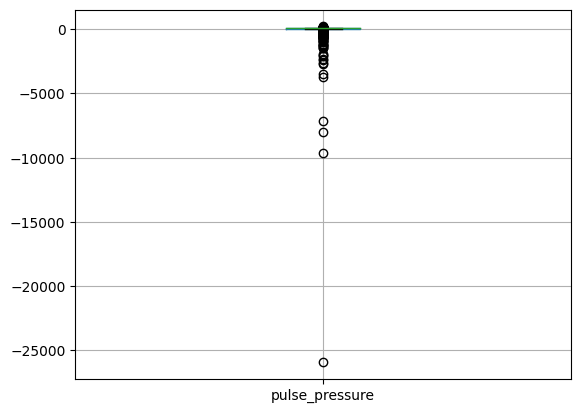

In [76]:
df2.boxplot('pulse_pressure')

In [77]:
##pulse pressure can obviously not be negative by definition
pp99925=df2['pulse_pressure'].quantile(0.99925)
print(pp99925)

119.32470833086224


In [78]:
##pulse pressure can obviously not be negative by definition
pp0025=df2['pulse_pressure'].quantile(0.0025)
print(pp0025)

-30.366310945250003


In [79]:
pp50=df2['pulse_pressure'].quantile(0.50)
print(pp50)

53.42857144999999


In [81]:
df2.loc[df2['pulse_pressure']>pp99925,'pulse_pressure']=pp50

In [82]:
pp004=df2['pulse_pressure'].quantile(0.004)
print(pp004)

5.5


In [83]:
count =(df2['pulse_pressure'] < pp004).sum()
print (count)

353


In [84]:
df2.loc[df2['pulse_pressure']<pp004,'pulse_pressure']=pp50

In [85]:
df2['pulse_pressure'].describe()

count    88346.000000
mean        55.814605
std         14.224159
min          5.500000
25%         45.714286
50%         53.428571
75%         63.700000
max        119.300000
Name: pulse_pressure, dtype: float64

<Axes: >

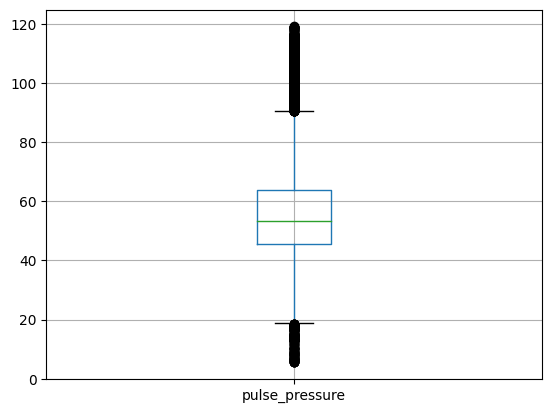

In [86]:
df2.boxplot('pulse_pressure')

<Axes: >

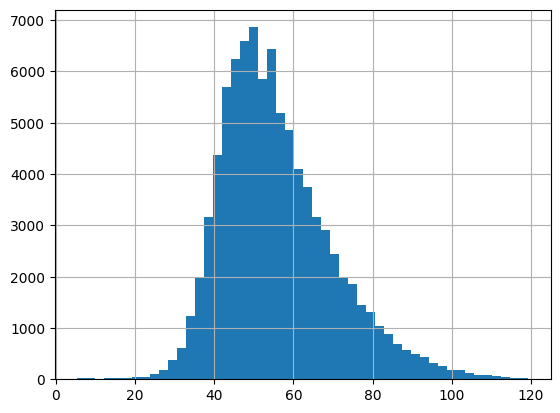

In [87]:
df2['pulse_pressure'].hist(bins=50)

In [89]:
## seems a bit skewed, will set pp >> pp9925 = pp50
df2.loc[df2['pulse_pressure']>pp99925,'pulse_pressure']=pp50

In [90]:
df2['pulse_pressure'].describe()

count    88346.000000
mean        55.814605
std         14.224159
min          5.500000
25%         45.714286
50%         53.428571
75%         63.700000
max        119.300000
Name: pulse_pressure, dtype: float64

<Axes: >

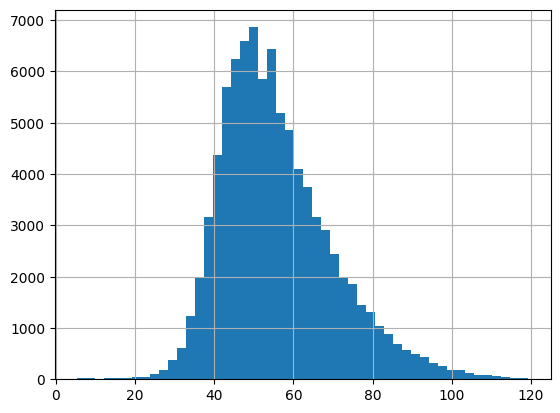

In [91]:
df2['pulse_pressure'].hist(bins=50)

In [92]:
df2['avg_O2sat'].describe()

count    88346.000000
mean        97.886679
std          2.502654
min          0.000000
25%         97.000000
50%         98.083333
75%         99.000000
max        395.666667
Name: avg_O2sat, dtype: float64

In [93]:
##O2 Sat can not be greater than 100%
count =(df2['avg_O2sat'] > 100).sum()
print (count)

20


In [94]:
p02s999=df2['avg_O2sat'].quantile(0.999)
print(p02s999)

100.0


In [95]:
pO2s995=df2['avg_O2sat'].quantile(0.995)
print(pO2s995)

100.0


In [96]:
count =(df2['avg_O2sat'] > 99.9).sum()
print (count)

6413


In [97]:
count =(df2['avg_O2sat'] < 80).sum()
print (count)

56


<Axes: >

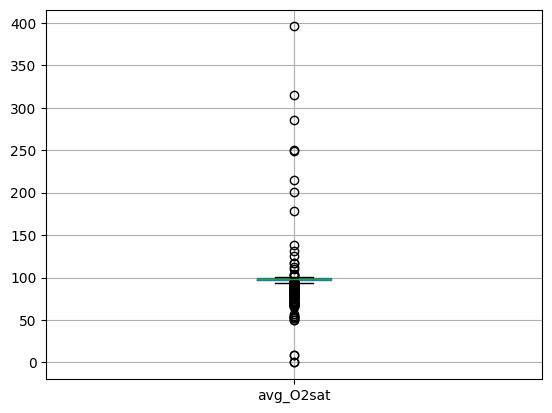

In [98]:
df2.boxplot('avg_O2sat')

In [99]:
pO2s002=df2['avg_O2sat'].quantile(0.002)
print(pO2s002)

89.1057291659


In [100]:
df2.loc[df2['avg_O2sat']>p02s999,'avg_O2sat']=p02s999

In [101]:
df2.loc[df2['avg_O2sat']<pO2s002,'avg_O2sat']=pO2s002

In [102]:
df2['avg_O2sat'].describe()

count    88346.000000
mean        97.889785
std          1.566022
min         89.105729
25%         97.000000
50%         98.083333
75%         99.000000
max        100.000000
Name: avg_O2sat, dtype: float64

In [103]:
##For this notebook - I want to add AVG_BMI into the model before I Start Evaluating Logistic Regression Models,
## but there are > 31 thousand NA rows in "AVG_BMI" column.... I am going to simply drop these rows before modeling:
## Update 3_28_24... removed AVG_BMI NA rows when joined columns in BigQuery
## ... SO NO LONGER NEED TO PERFROM ANY OF THE BELOW STEPS

In [ ]:
## not using the AVG BMI data ... it was found not to be impactful in original D699 evaluating
## df2= df.dropna(subset=['AVG_BMI'])

In [131]:
##df2['Survival'].value_counts()

In [ ]:
## so, still 88,346 rows in df2... including  13,183 deaths... will move forward with
##regression model on this smaller dataset
##df2.info()

In [ ]:
## BMI range from 16 severely underweight to 40+ severely obese
##(https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi/#
##df2['AVG_BMI'].describe()

<Axes: >

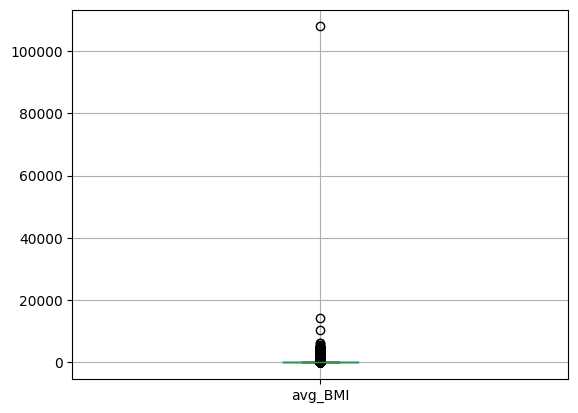

In [104]:
## still need to look at outliers in AVG_BMI column in df2... Max (107840) and Min (0) values are obviously incorrect
## NIH Tables for BMI stop at 55 (~ 6 foot tall person weighing 400 pounds) https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm
df2.boxplot('avg_BMI')

In [105]:
count =(df2['avg_BMI'] > 55).sum()
print (count)

620


In [106]:
count =(df2['avg_BMI'] > 60).sum()
print (count)

376


In [107]:
pbmi50=df2['avg_BMI'].quantile(0.50)
print(pbmi50)

27.4


In [108]:
pbmi996=df2['avg_BMI'].quantile(0.996)
print(pbmi996)

60.70258333539998


In [109]:
df2.loc[df2['avg_BMI']>pbmi996,'avg_BMI']=pbmi50

In [110]:
df2['avg_BMI'].describe()

count    88346.000000
mean        28.432219
std          6.712353
min          0.000000
25%         23.800000
50%         27.400000
75%         31.900000
max         60.700000
Name: avg_BMI, dtype: float64

In [111]:
count =(df2['avg_BMI'] < 14).sum()
print (count)

201


In [112]:
count =(df2['avg_BMI'] < 15).sum()
print (count)

279


In [113]:
pbmi003=df2['avg_BMI'].quantile(0.003)
print(pbmi003)

14.8


In [114]:
df2.loc[df2['avg_BMI']<pbmi003,'avg_BMI']=pbmi50

In [115]:
df2['avg_BMI'].describe()

count    88346.000000
mean        28.481578
std          6.638902
min         14.800000
25%         23.840000
50%         27.400000
75%         31.900000
max         60.700000
Name: avg_BMI, dtype: float64

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88346 non-null  float64        
 7   avg_sbp                   88346 non-null  float64        
 8   avg_dbp                   88346 non-null  float64        
 9   avg_O2sat                 88346 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [117]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,88346.0,15018219.746044,2886864.424344,10000032.0,12508720.25,15035590.0,17521559.25,19999828.0
age_patient,88346.0,56.098646,19.358011,18.0,41.0,58.0,71.0,91.0
inptdeath,88346.0,0.03458,0.182714,0.0,0.0,0.0,0.0,1.0
avg_HR,88346.0,80.576066,13.744783,7.0,71.0,79.5,88.85582,197.909091
avg_sbp,88346.0,129.06102,17.016914,11.0,117.0,127.705882,139.333333,293.0
avg_dbp,88346.0,74.833727,106.162224,6.0,66.0,72.928571,80.0,26028.5
avg_O2sat,88346.0,97.889785,1.566022,89.105729,97.0,98.083333,99.0,100.0
avg_BMI,88346.0,28.481578,6.638902,14.8,23.84,27.4,31.9,60.7
race_category,88346.0,1.919895,1.454749,1.0,1.0,1.0,2.0,5.0
gender_category,88346.0,1.55595,0.496862,1.0,1.0,2.0,2.0,2.0


In [ ]:
## Need to remove the inpatient deaths from model as more interested in being able to predict risk of patients discharged from hospital/ED

In [118]:
df2['inptdeath'].value_counts()

0    85291
1     3055
Name: inptdeath, dtype: int64

In [119]:
## want to delete the 4732 rows containing patients that died during their hospitilization or ED visit
print (df2[df2.inptdeath != 1])

       subject_id  age_patient date_of_death  inptdeath               atime  \
0        18179783           86    2212-01-22          0 2208-04-30 16:47:00   
1        11756261           62    2212-01-14          0 2201-10-12 08:45:00   
2        16477638           61    2211-09-16          0 2210-10-09 14:33:00   
3        13774741           91    2211-02-27          0 2210-10-26 20:21:00   
8        10497215           88    2210-04-19          0 2209-11-20 19:01:00   
...           ...          ...           ...        ...                 ...   
88341    15907631           18           NaT          0 2189-08-04 06:55:00   
88342    17027269           18           NaT          0 2189-10-04 17:28:00   
88343    17946600           18           NaT          0 2189-07-19 21:00:00   
88344    19531581           18           NaT          0 2196-08-17 18:40:00   
88345    14332783           18           NaT          0 2201-05-15 20:10:00   

                    dtime     avg_HR     avg_sbp   

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88346 entries, 0 to 88345
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   age_patient               88346 non-null  int64          
 2   date_of_death             13183 non-null  datetime64[ns] 
 3   inptdeath                 88346 non-null  int64          
 4   atime                     88346 non-null  datetime64[ns] 
 5   dtime                     88346 non-null  datetime64[ns] 
 6   avg_HR                    88346 non-null  float64        
 7   avg_sbp                   88346 non-null  float64        
 8   avg_dbp                   88346 non-null  float64        
 9   avg_O2sat                 88346 non-null  float64        
 10  avg_BMI                   88346 non-null  float64        
 11  race_category             88346 non-null  int64          
 12  gend

In [121]:
df2 = df2[df2['inptdeath'] == 0]

In [152]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,85291.0,15017652.817671,2885445.778757,10000032.0,12507087.0,15035611.0,17519203.5,19999828.0
age_patient,85291.0,55.637582,19.359207,18.0,40.0,57.0,70.0,91.0
inptdeath,85291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,85291.0,80.342978,13.626526,7.0,71.0,79.25,88.5,197.909091
avg_sbp,85291.0,129.237971,16.949022,11.0,117.333333,127.888889,139.5,293.0
avg_dbp,85291.0,75.047158,107.938527,6.0,66.333333,73.0,80.107246,26028.5
avg_O2sat,85291.0,97.913273,1.552406,89.105729,97.0,98.125,99.0,100.0
avg_BMI,85291.0,28.519936,6.645351,14.8,23.889087,27.4,31.922902,60.7
race_category,85291.0,1.921234,1.454403,1.0,1.0,1.0,2.0,5.0
gender_category,85291.0,1.55898,0.496512,1.0,1.0,2.0,2.0,2.0


In [122]:
## inpatient deaths are now all 0 per above... will confirm with value_counts
df2['inptdeath'].value_counts()

0    85291
Name: inptdeath, dtype: int64

In [123]:
## This eliminated all of the patients that died during hospitilization... what are the target variable value counts now?
df2['outpatient_death'].value_counts()

0.0    75163
1.0    10128
Name: outpatient_death, dtype: int64

In [125]:
(df2['outpatient_death'].value_counts()) / len(df2) * 100

0.0    88.125359
1.0    11.874641
Name: outpatient_death, dtype: float64

In [126]:
## Note : this remains a very imbalanced dataset Ratio of outpatient_death ("1")/alive ("0") = 10128/75163 = 7.4:1
## 88.1% of patients = "alive"/"0"... 11.9% = "outpatient death"/"1"

In [127]:
## now will explore next variable of interest... "length_of_stay"
## first will convert to an integer type

In [128]:
df2['length_of_stay'] = df2['length_of_stay'].dt.days.astype('int64')

<ipython-input-128-1873836fa904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length_of_stay'] = df2['length_of_stay'].dt.days.astype('int64')


<Axes: >

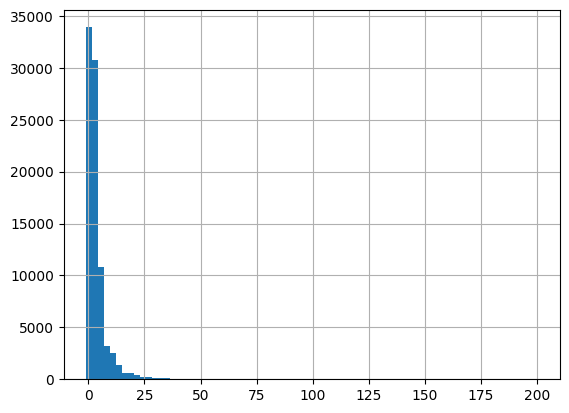

In [129]:
df2['length_of_stay'].hist(bins=75)

In [130]:
df2['length_of_stay'].describe()

count    85291.000000
mean         3.670962
std          5.932927
min         -1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        200.000000
Name: length_of_stay, dtype: float64

In [131]:
##Makes no sense that length of stay is negative
count =(df2['length_of_stay'] < 0).sum()
print (count)

5


In [132]:
## a very minimal number (4) ... will just set these to p50
plos50=df2['length_of_stay'].quantile(0.50)
print(plos50)

2.0


In [134]:
##going to go back and just resest these negative values to the plos50 value .
df2.loc[df2['length_of_stay']<0,'length_of_stay']=plos50

<Axes: >

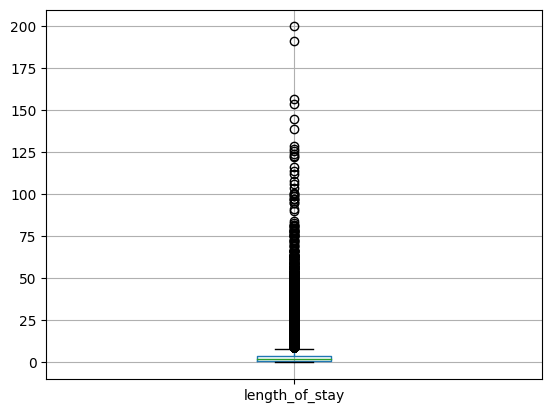

In [135]:
df2.boxplot('length_of_stay')

In [136]:
plos999=df2['length_of_stay'].quantile(0.999)
print(plos999)

63.7100000000064


In [137]:
df2['length_of_stay'].describe()

count    85291.000000
mean         3.671138
std          5.932833
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        200.000000
Name: length_of_stay, dtype: float64

In [138]:
count =(df2['length_of_stay'] >64).sum()

print (count)

81


In [139]:
##going to go back and just resest these negative values to the 99.9th percentile .
df2.loc[df2['length_of_stay']>plos999,'length_of_stay']=plos999

In [140]:
df2['length_of_stay'].describe()

count    85291.000000
mean         3.645520
std          5.541553
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         63.710000
Name: length_of_stay, dtype: float64

In [141]:
plos995=df2['length_of_stay'].quantile(0.995)
print(plos995)

37.0


In [142]:
count =(df2['length_of_stay'] >37).sum()

print (count)

418


In [143]:
##going to go back and just resest these negative values to the 99.5th percentile .
df2.loc[df2['length_of_stay']>plos995,'length_of_stay']=plos995

In [144]:
df2['length_of_stay'].describe()

count    85291.000000
mean         3.579170
std          4.996191
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         37.000000
Name: length_of_stay, dtype: float64

In [145]:
### now going to create a separate categorial dtype column binning length of stay durations
df2['days_in_hospital_cat'] = pd.cut(x=df2['length_of_stay'], bins=[0, 0.99, 1.99, 2.99, 3.99, 4.99, 13.99,38], right=False, labels=[1, 2, 3,4,5,6 ,7])

<ipython-input-145-e789f1103b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['days_in_hospital_cat'] = pd.cut(x=df2['length_of_stay'], bins=[0, 0.99, 1.99, 2.99, 3.99, 4.99, 13.99,38], right=False, labels=[1, 2, 3,4,5,6 ,7])


In [146]:
df2['days_in_hospital_cat'].value_counts()

1    17387
6    17058
2    16517
3    13709
4     9802
5     7220
7     3598
Name: days_in_hospital_cat, dtype: int64

In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 88345
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   age_patient               85291 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 85291 non-null  int64          
 4   atime                     85291 non-null  datetime64[ns] 
 5   dtime                     85291 non-null  datetime64[ns] 
 6   avg_HR                    85291 non-null  float64        
 7   avg_sbp                   85291 non-null  float64        
 8   avg_dbp                   85291 non-null  float64        
 9   avg_O2sat                 85291 non-null  float64        
 10  avg_BMI                   85291 non-null  float64        
 11  race_category             85291 non-null  int64          
 12  gend

In [148]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,85291.0,15017652.817671,2885445.778757,10000032.0,12507087.0,15035611.0,17519203.5,19999828.0
age_patient,85291.0,55.637582,19.359207,18.0,40.0,57.0,70.0,91.0
inptdeath,85291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,85291.0,80.342978,13.626526,7.0,71.0,79.25,88.5,197.909091
avg_sbp,85291.0,129.237971,16.949022,11.0,117.333333,127.888889,139.5,293.0
avg_dbp,85291.0,75.047158,107.938527,6.0,66.333333,73.0,80.107246,26028.5
avg_O2sat,85291.0,97.913273,1.552406,89.105729,97.0,98.125,99.0,100.0
avg_BMI,85291.0,28.519936,6.645351,14.8,23.889087,27.4,31.922902,60.7
race_category,85291.0,1.921234,1.454403,1.0,1.0,1.0,2.0,5.0
gender_category,85291.0,1.55898,0.496512,1.0,1.0,2.0,2.0,2.0


In [149]:
## now convert race_category to a category dtype
from pandas.api.types import CategoricalDtype

In [150]:
df2['race_category_cat'] = pd.Categorical(df2.race_category)

<ipython-input-150-4eafaa5f701d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['race_category_cat'] = pd.Categorical(df2.race_category)


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 88345
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   age_patient               85291 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 85291 non-null  int64          
 4   atime                     85291 non-null  datetime64[ns] 
 5   dtime                     85291 non-null  datetime64[ns] 
 6   avg_HR                    85291 non-null  float64        
 7   avg_sbp                   85291 non-null  float64        
 8   avg_dbp                   85291 non-null  float64        
 9   avg_O2sat                 85291 non-null  float64        
 10  avg_BMI                   85291 non-null  float64        
 11  race_category             85291 non-null  int64          
 12  gend

In [ ]:
##df['avg_O2sat'] = pd.to_numeric(df['avg_O2sat'])

In [152]:
df2['time_to_outpatient_death'].describe()

count                          10128
mean     127 days 23:09:39.887440758
std      209 days 19:41:05.238761876
min             -2172 days +06:30:00
25%                 18 days 07:06:00
50%                 67 days 05:52:00
75%                180 days 07:51:30
max               3901 days 20:30:00
Name: time_to_outpatient_death, dtype: object

In [153]:
df2['time_to_outpatient_death'].isnull()

0        False
1        False
2        False
3        False
8        False
         ...  
88341     True
88342     True
88343     True
88344     True
88345     True
Name: time_to_outpatient_death, Length: 85291, dtype: bool

In [154]:
df2['time_to_outpatient_death'].isnull() ==0


0         True
1         True
2         True
3         True
8         True
         ...  
88341    False
88342    False
88343    False
88344    False
88345    False
Name: time_to_outpatient_death, Length: 85291, dtype: bool

In [ ]:
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].fillna(0)
##df['column'].fillna(pd.Timedelta(seconds=0))
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].fillna((pd.Timedelta(days=0))
##df['time_to_outpatient_death_no_nulls'] = df['time_to_outpatient_death'].replace({'NaT': 0}, inplace=True)
##df['time_to_outpatient_death_no_nulls'] = pd.to_numeric(df['time_to_outpatient_death']).fillna(0)
## maybe need to convert this to an intermediate colum and then to numeric?
##df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)


In [ ]:
## NOT HELPFUL - DON'T UN COMMENT!
##df['time_to_outpatient_death_no_nulls'].value_counts()
## This resulted from ##df['time_to_outpatient_death_no_nulls'] = pd.to_numeric(df['time_to_outpatient_death']).fillna(0)

In [ ]:
## THIS IS IT!!... do this for both death_30 days and death_60 days
## First convert time to outpateitn death to new column in dt.days
#1 df['outpatient_death_30days'] = df['time_to_outpatient_death'].dt.days
##then convert that column to numeric  filling NaT values with 0
# 2 df['outpatient_death_30'] = pd.to_numeric(df['outpatient_death_30days']).fillna(0)
# 3 df['outpatient_death_30'].value_counts()

In [ ]:
##want to create two new columns that capture the number of patients that died within 30 days of hospital discharge... and 2) those that died within 60 days of hospital discharge>

In [155]:
df2['outpatient_death_30days'] = df2['time_to_outpatient_death'].dt.days

<ipython-input-155-6d306fc79ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30days'] = df2['time_to_outpatient_death'].dt.days


In [156]:
df2['outpatient_death_30'] = pd.to_numeric(df2['outpatient_death_30days']).fillna(0)

<ipython-input-156-971987a9fc64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'] = pd.to_numeric(df2['outpatient_death_30days']).fillna(0)


In [157]:
df2['outpatient_death_30'].value_counts()

0.0       75345
1.0         210
2.0         184
4.0         179
3.0         164
          ...  
540.0         1
900.0         1
1144.0        1
495.0         1
916.0         1
Name: outpatient_death_30, Length: 667, dtype: int64

In [158]:
df2['outpatient_death'].value_counts()

0.0    75163
1.0    10128
Name: outpatient_death, dtype: int64

In [159]:
##2-24 attemtping to create this two new columns as potential alternate independant variables
## patients that died outside of the 30 day window would be set to '0'
df2['outpatient_death_30'][df2['outpatient_death_30']>30] = 0

<ipython-input-159-2c1796d3e35c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']>30] = 0
<ipython-input-159-2c1796d3e35c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']>30] = 0


In [160]:
df2['outpatient_death_30'][df2['outpatient_death_30']<0] = 0

<ipython-input-160-5df4b0fd0a51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']<0] = 0
<ipython-input-160-5df4b0fd0a51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']<0] = 0


In [161]:
df2['outpatient_death_30'].value_counts()

0.0     82111
1.0       210
2.0       184
4.0       179
3.0       164
7.0       151
9.0       128
5.0       126
8.0       124
6.0       122
11.0      118
12.0      114
14.0      114
13.0      112
10.0      111
22.0       97
16.0       96
17.0       96
19.0       87
18.0       78
21.0       78
15.0       77
26.0       77
20.0       77
24.0       75
29.0       75
23.0       72
25.0       67
30.0       58
28.0       57
27.0       56
Name: outpatient_death_30, dtype: int64

In [162]:
## Now the only value in this column are "0" and positive integers between 1 and 30.
## These values can all now be set to "1" ("outpatient death within 30 days")

In [163]:
df2['outpatient_death_30'][df2['outpatient_death_30']>0] = 1

<ipython-input-163-9fb19f7dd2ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']>0] = 1
<ipython-input-163-9fb19f7dd2ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_30'][df2['outpatient_death_30']>0] = 1


In [164]:
df2['outpatient_death_30'].value_counts()

0.0    82111
1.0     3180
Name: outpatient_death_30, dtype: int64

In [165]:
## Now have a second potential binary outcome column 'outpatient_death_30' ... will repeat to create "outpatient_death_60
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 88345
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   age_patient               85291 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 85291 non-null  int64          
 4   atime                     85291 non-null  datetime64[ns] 
 5   dtime                     85291 non-null  datetime64[ns] 
 6   avg_HR                    85291 non-null  float64        
 7   avg_sbp                   85291 non-null  float64        
 8   avg_dbp                   85291 non-null  float64        
 9   avg_O2sat                 85291 non-null  float64        
 10  avg_BMI                   85291 non-null  float64        
 11  race_category             85291 non-null  int64          
 12  gend

In [166]:
df2['outpatient_death_60days'] = df2['time_to_outpatient_death'].dt.days

<ipython-input-166-2b3efb1082fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60days'] = df2['time_to_outpatient_death'].dt.days


In [167]:
df2['outpatient_death_60'] = pd.to_numeric(df2['outpatient_death_60days']).fillna(0)

<ipython-input-167-79df4ca89bc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'] = pd.to_numeric(df2['outpatient_death_60days']).fillna(0)


In [168]:
df2['outpatient_death_60'].value_counts()

0.0       75345
1.0         210
2.0         184
4.0         179
3.0         164
          ...  
540.0         1
900.0         1
1144.0        1
495.0         1
916.0         1
Name: outpatient_death_60, Length: 667, dtype: int64

In [169]:
## patients that died outside of the 60 day window would be set to '0'
df2['outpatient_death_60'][df2['outpatient_death_60']>60] = 0

<ipython-input-169-d4d8b73b3179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']>60] = 0
<ipython-input-169-d4d8b73b3179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']>60] = 0


In [170]:
df2['outpatient_death_60'].value_counts()

 0.0       80615
 1.0         210
 2.0         184
 4.0         179
 3.0         164
           ...  
-1887.0        1
-2172.0        1
-762.0         1
-1912.0        1
-2.0           1
Name: outpatient_death_60, Length: 70, dtype: int64

In [171]:
## also setting negative values to "0"
df2['outpatient_death_60'][df2['outpatient_death_60']<0] = 0

<ipython-input-171-322520170726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']<0] = 0
<ipython-input-171-322520170726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']<0] = 0


In [172]:
## Now the only value in this column are "0" and positive integers between 1 and 60.
## These values can all now be set to "1" ("outpatient death within 60 days")
df2['outpatient_death_60'][df2['outpatient_death_60']>0] = 1

<ipython-input-172-02d1dc23d78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']>0] = 1
<ipython-input-172-02d1dc23d78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['outpatient_death_60'][df2['outpatient_death_60']>0] = 1


In [173]:
df2['outpatient_death_60'].value_counts()

0.0    80710
1.0     4581
Name: outpatient_death_60, dtype: int64

In [175]:
## so 3180 patients died within 30 days of discharge and 4581 died within 60 days (compared to  that died within one year)
##How many patients died between 30 and 60 days? ... 1,778
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 88345
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   age_patient               85291 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 85291 non-null  int64          
 4   atime                     85291 non-null  datetime64[ns] 
 5   dtime                     85291 non-null  datetime64[ns] 
 6   avg_HR                    85291 non-null  float64        
 7   avg_sbp                   85291 non-null  float64        
 8   avg_dbp                   85291 non-null  float64        
 9   avg_O2sat                 85291 non-null  float64        
 10  avg_BMI                   85291 non-null  float64        
 11  race_category             85291 non-null  int64          
 12  gend

In [176]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,85291.0,15017652.817671,2885445.778757,10000032.0,12507087.0,15035611.0,17519203.5,19999828.0
age_patient,85291.0,55.637582,19.359207,18.0,40.0,57.0,70.0,91.0
inptdeath,85291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avg_HR,85291.0,80.342978,13.626526,7.0,71.0,79.25,88.5,197.909091
avg_sbp,85291.0,129.237971,16.949022,11.0,117.333333,127.888889,139.5,293.0
avg_dbp,85291.0,75.047158,107.938527,6.0,66.333333,73.0,80.107246,26028.5
avg_O2sat,85291.0,97.913273,1.552406,89.105729,97.0,98.125,99.0,100.0
avg_BMI,85291.0,28.519936,6.645351,14.8,23.889087,27.4,31.922902,60.7
race_category,85291.0,1.921234,1.454403,1.0,1.0,1.0,2.0,5.0
gender_category,85291.0,1.55898,0.496512,1.0,1.0,2.0,2.0,2.0


In [177]:
df2.isnull().sum()

subject_id                      0
age_patient                     0
date_of_death               75163
inptdeath                       0
atime                           0
dtime                           0
avg_HR                          0
avg_sbp                         0
avg_dbp                         0
avg_O2sat                       0
avg_BMI                         0
race_category                   0
gender_category                 0
max_HR                          0
pulse_pressure                  0
est_vO2_max                     0
length_of_stay                  0
time_to_outpatient_death    75163
outpatient_death                0
days_in_hospital_cat            0
race_category_cat               0
outpatient_death_30days     75163
outpatient_death_30             0
outpatient_death_60days     75163
outpatient_death_60             0
dtype: int64

In [178]:
## Now will run models comparing 30 day, 60 day and 1 year predictions on risk of outpatient death versus survival

In [179]:
pip install PYCARET

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.6 

In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 88345
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   age_patient               85291 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 85291 non-null  int64          
 4   atime                     85291 non-null  datetime64[ns] 
 5   dtime                     85291 non-null  datetime64[ns] 
 6   avg_HR                    85291 non-null  float64        
 7   avg_sbp                   85291 non-null  float64        
 8   avg_dbp                   85291 non-null  float64        
 9   avg_O2sat                 85291 non-null  float64        
 10  avg_BMI                   85291 non-null  float64        
 11  race_category             85291 non-null  int64          
 12  gend

In [181]:
## Will use undersampling technique first... first starting with stratification... stratify datasets by number of "1" outpaitent death events
## 12944 for original dataset, then 4052 for 30 day death set... and 5830 for 60 day...
## This will create three datasets with 1) Outpatient death w/i one year, 2) Outpatient death w/i 30 days and 3) Outpatient death w/i 60 days as the independant variables for each

In [182]:
df2_strat=df2.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(10128))
##df.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(12944))

In [183]:
df2_strat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20256 entries, 51154 to 2795
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                20256 non-null  int64          
 1   age_patient               20256 non-null  int64          
 2   date_of_death             10128 non-null  datetime64[ns] 
 3   inptdeath                 20256 non-null  int64          
 4   atime                     20256 non-null  datetime64[ns] 
 5   dtime                     20256 non-null  datetime64[ns] 
 6   avg_HR                    20256 non-null  float64        
 7   avg_sbp                   20256 non-null  float64        
 8   avg_dbp                   20256 non-null  float64        
 9   avg_O2sat                 20256 non-null  float64        
 10  avg_BMI                   20256 non-null  float64        
 11  race_category             20256 non-null  int64          
 12  g

In [184]:
df2_strat_30=df2.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(3180))


In [185]:
df2_strat_60=df2.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(4581))

In [186]:
df2_strat_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 72062 to 7240
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                6360 non-null   int64          
 1   age_patient               6360 non-null   int64          
 2   date_of_death             3451 non-null   datetime64[ns] 
 3   inptdeath                 6360 non-null   int64          
 4   atime                     6360 non-null   datetime64[ns] 
 5   dtime                     6360 non-null   datetime64[ns] 
 6   avg_HR                    6360 non-null   float64        
 7   avg_sbp                   6360 non-null   float64        
 8   avg_dbp                   6360 non-null   float64        
 9   avg_O2sat                 6360 non-null   float64        
 10  avg_BMI                   6360 non-null   float64        
 11  race_category             6360 non-null   int64          
 12  ge

In [187]:
df2_strat_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9162 entries, 82565 to 9966
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                9162 non-null   int64          
 1   age_patient               9162 non-null   int64          
 2   date_of_death             4911 non-null   datetime64[ns] 
 3   inptdeath                 9162 non-null   int64          
 4   atime                     9162 non-null   datetime64[ns] 
 5   dtime                     9162 non-null   datetime64[ns] 
 6   avg_HR                    9162 non-null   float64        
 7   avg_sbp                   9162 non-null   float64        
 8   avg_dbp                   9162 non-null   float64        
 9   avg_O2sat                 9162 non-null   float64        
 10  avg_BMI                   9162 non-null   float64        
 11  race_category             9162 non-null   int64          
 12  ge

In [188]:
## 2-24 let's look at african american (race category 2 only)
## Then will repeat for caucasion/white (race category 1 only)... and hispanic/latino (race category 3 only)
## 3-28 ... repeating above steps including BMI data (df2)

In [189]:
df2['race_category'].value_counts()

1    53565
2    12689
5    12455
3     3682
4     2900
Name: race_category, dtype: int64

In [190]:
df2_racecat_2 = df2[df2['race_category'] == 2]

In [191]:
df2_racecat_1 = df2[df2['race_category'] == 1]

In [193]:
df2_racecat_3 = df2[df2['race_category'] == 3]

In [194]:
df2_racecat_2 .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12689 entries, 1 to 88345
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                12689 non-null  int64          
 1   age_patient               12689 non-null  int64          
 2   date_of_death             1077 non-null   datetime64[ns] 
 3   inptdeath                 12689 non-null  int64          
 4   atime                     12689 non-null  datetime64[ns] 
 5   dtime                     12689 non-null  datetime64[ns] 
 6   avg_HR                    12689 non-null  float64        
 7   avg_sbp                   12689 non-null  float64        
 8   avg_dbp                   12689 non-null  float64        
 9   avg_O2sat                 12689 non-null  float64        
 10  avg_BMI                   12689 non-null  float64        
 11  race_category             12689 non-null  int64          
 12  gend

In [195]:
df2_racecat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53565 entries, 9 to 88341
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                53565 non-null  int64          
 1   age_patient               53565 non-null  int64          
 2   date_of_death             7349 non-null   datetime64[ns] 
 3   inptdeath                 53565 non-null  int64          
 4   atime                     53565 non-null  datetime64[ns] 
 5   dtime                     53565 non-null  datetime64[ns] 
 6   avg_HR                    53565 non-null  float64        
 7   avg_sbp                   53565 non-null  float64        
 8   avg_dbp                   53565 non-null  float64        
 9   avg_O2sat                 53565 non-null  float64        
 10  avg_BMI                   53565 non-null  float64        
 11  race_category             53565 non-null  int64          
 12  gend

In [196]:
df2_racecat_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 50 to 88289
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                3682 non-null   int64          
 1   age_patient               3682 non-null   int64          
 2   date_of_death             176 non-null    datetime64[ns] 
 3   inptdeath                 3682 non-null   int64          
 4   atime                     3682 non-null   datetime64[ns] 
 5   dtime                     3682 non-null   datetime64[ns] 
 6   avg_HR                    3682 non-null   float64        
 7   avg_sbp                   3682 non-null   float64        
 8   avg_dbp                   3682 non-null   float64        
 9   avg_O2sat                 3682 non-null   float64        
 10  avg_BMI                   3682 non-null   float64        
 11  race_category             3682 non-null   int64          
 12  gend

In [ ]:
##All look correct based on value counts above... df_racecat_3 is smaller though and only contains 230 deaths

In [197]:
df2_racecat_2['outpatient_death'].value_counts()

0.0    11612
1.0     1077
Name: outpatient_death, dtype: int64

In [198]:
df2_racecat_2['outpatient_death_60'].value_counts()

0.0    12191
1.0      498
Name: outpatient_death_60, dtype: int64

In [199]:
df2_racecat_2['outpatient_death_30'].value_counts()

0.0    12332
1.0      357
Name: outpatient_death_30, dtype: int64

In [200]:
## Will stratify this df_racecat_2 by # of outpatient deaths
df2_racecat_2_strat=df2_racecat_2.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(1077))
df2_racecat_2_strat_60=df2_racecat_2.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(498))
df2_racecat_2_strat_30=df2_racecat_2.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(357))

In [201]:
## Repeat above for df_racecat_1
df2_racecat_1['outpatient_death'].value_counts()

0.0    46216
1.0     7349
Name: outpatient_death, dtype: int64

In [202]:
df2_racecat_1['outpatient_death_60'].value_counts()

0.0    50294
1.0     3271
Name: outpatient_death_60, dtype: int64

In [203]:
df2_racecat_1['outpatient_death_30'].value_counts()

0.0    51311
1.0     2254
Name: outpatient_death_30, dtype: int64

In [204]:
# Will stratify this df_racecat_1 by # of outpatient deaths
df2_racecat_1_strat=df2_racecat_1.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(7349))
df2_racecat_1_strat_60=df2_racecat_1.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(3271))
df2_racecat_1_strat_30=df2_racecat_1.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(2254))

In [205]:
## and now repeat for df_racecat_3
df2_racecat_3['outpatient_death'].value_counts()

0.0    3506
1.0     176
Name: outpatient_death, dtype: int64

In [206]:
df2_racecat_3['outpatient_death_60'].value_counts()

0.0    3594
1.0      88
Name: outpatient_death_60, dtype: int64

In [207]:
df2_racecat_3['outpatient_death_30'].value_counts()

0.0    3620
1.0      62
Name: outpatient_death_30, dtype: int64

In [ ]:
## Now will repeat the avove stratification for df_race_cat_3
## FOR BMI DF2... numbers are very small

In [ ]:
# Will stratify this df_racecat_3 by # of outpatient deaths
##df_racecat_3_strat=df_racecat_3.groupby('outpatient_death', group_keys=False).apply(lambda x: x.sample(230))
##df_racecat_3_strat_60=df_racecat_3.groupby('outpatient_death_60', group_keys=False).apply(lambda x: x.sample(109))
##df_racecat_3_strat_30=df_racecat_3.groupby('outpatient_death_30', group_keys=False).apply(lambda x: x.sample(74))

In [ ]:
## will start by comparing 60 day outpatient death models for all three race dataframes stratified by outpatient death numbers

In [208]:
data2_racecat_2_strat_60 =df2_racecat_2_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'avg_BMI', 'outpatient_death_60']]

In [ ]:
##data2_racecat_3_strat_60 =df2_racecat_3_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat','outpatient_death_60']]

In [209]:
data2_racecat_1_strat_60 =df2_racecat_1_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat','avg_BMI','outpatient_death_60']]

In [210]:
data2_strat_60 =df2_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat','avg_BMI' ,'outpatient_death_60']]

In [ ]:
## Results of above are best so far: Random Forest Classifier	0.7931	0.8588	0.8066	0.7916	0.7951	0.5862	0.5917	0.2500 78%/80%

In [ ]:
## data_racecat_2 =df_racecat_2_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death']]

In [ ]:
## Not as good as outpatient_death_60 model

In [ ]:
## Now create these stratified dataframes for modeling

In [ ]:
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','outpatient_death']]
## AdaBoost Acc = .7135 71%/74%
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','race_category', 'outpatient_death']]
## 	Gradient Boosting Classifier Acc = 7284 69%/74%
##data =df_strat[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death']]
## 	Gradient Boosting Classifier Acc = 7255 69%/78%



In [ ]:
## look at our most predictive model above substituting 30 and 60 day outcome data
##data_60 =df_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_60']]

In [ ]:
## Results with data_60 above: Gradient Boosting Classifier	0.7385	0.8136	0.7824	0.7197	0.7495	0.4770	0.4793	0.9270 (72%/77%)

In [ ]:
#data_60 =df_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'race_category', 'outpatient_death_60']]
##Results of above: gbc	Gradient Boosting Classifier	0.7462	0.8194	0.7998	0.7229	0.7592	0.4925	0.4956	0.9670

In [ ]:
#data_30 =df_strat_30[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'outpatient_death_30']]

In [ ]:
## data_60.info()

In [ ]:
##Now will evaluate these three stratified dfs
### 3_28_24- DONT CHANGE BELOW; THESE VERSIONS ARE FOR CHITA CONFERENCE

DO NOT RE RUN THESE MODELS... NEED TO KEEP FOR CONFERENCE AND FINAL PRESENTATION

In [ ]:
##from pycaret.classification import *
##s = setup(data =data_racecat_2_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,8704
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(1166, 6)"
4,Transformed data shape,"(1166, 6)"
5,Transformed train set shape,"(816, 6)"
6,Transformed test set shape,"(350, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7634,0.8258,0.7743,0.7602,0.7650,0.5267,0.5299,0.1350
gbc,Gradient Boosting Classifier,0.7623,0.8302,0.7793,0.7557,0.7659,0.5245,0.5269,0.1860
lr,Logistic Regression,0.7573,0.8378,0.7696,0.7525,0.7597,0.5146,0.5165,0.0420
et,Extra Trees Classifier,0.7560,0.8278,0.7743,0.7495,0.7593,0.5120,0.5157,0.1970
rf,Random Forest Classifier,0.7548,0.8214,0.7840,0.7428,0.7615,0.5096,0.5122,0.3220
ridge,Ridge Classifier,0.7524,0.0000,0.7795,0.7419,0.7588,0.5049,0.5077,0.0280
lda,Linear Discriminant Analysis,0.7524,0.8354,0.7795,0.7419,0.7588,0.5049,0.5077,0.0330
xgboost,Extreme Gradient Boosting,0.7389,0.8171,0.7374,0.7412,0.7364,0.4777,0.4812,0.0810
nb,Naive Bayes,0.7278,0.8081,0.6962,0.7466,0.7187,0.4558,0.4587,0.0320
knn,K Neighbors Classifier,0.7267,0.7965,0.7376,0.7260,0.7295,0.4535,0.4563,0.0510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

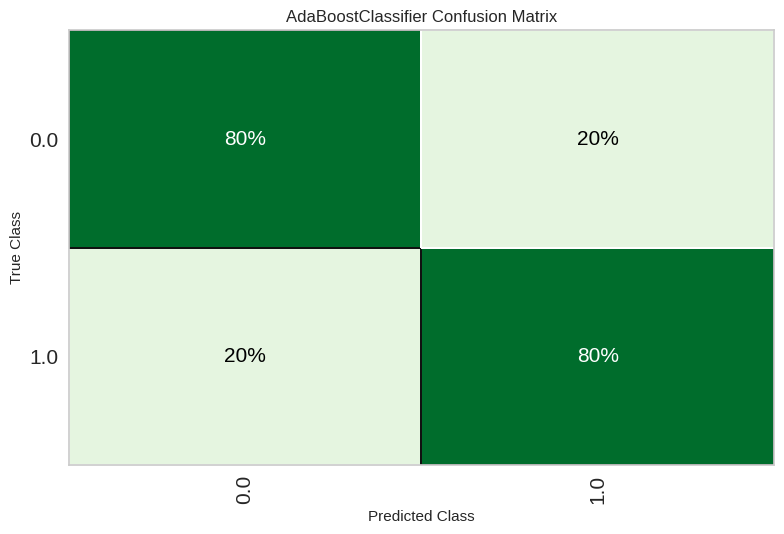

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
#plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

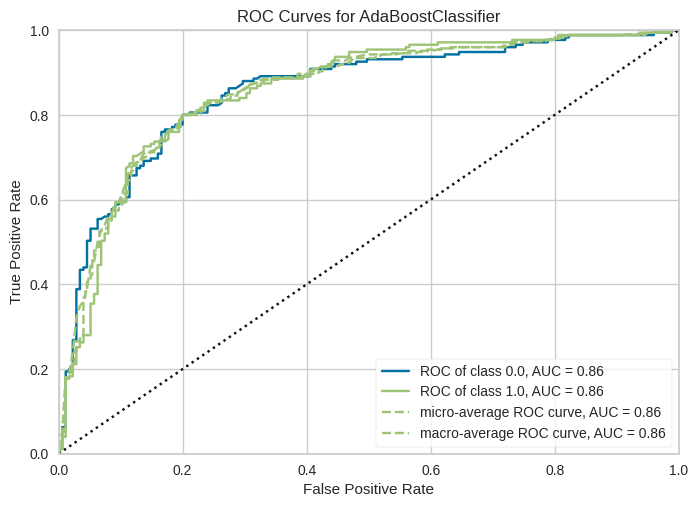

In [ ]:
# plot AUC
#plot_model(best, plot = 'auc')

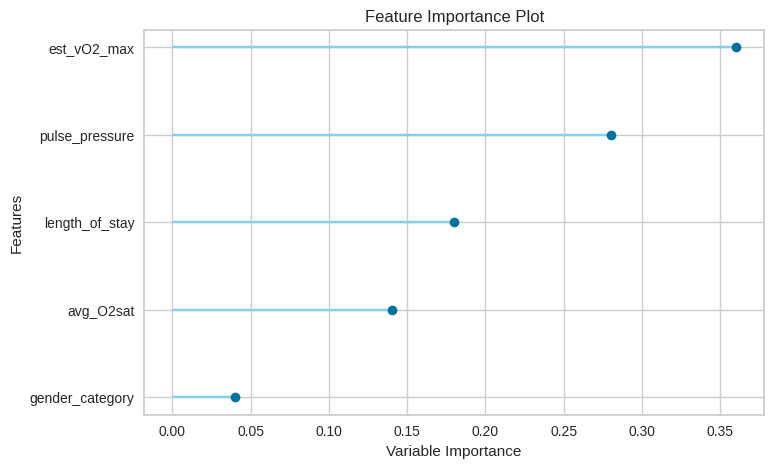

In [ ]:
# plot feature importance
#plot_model(best, plot = 'feature')

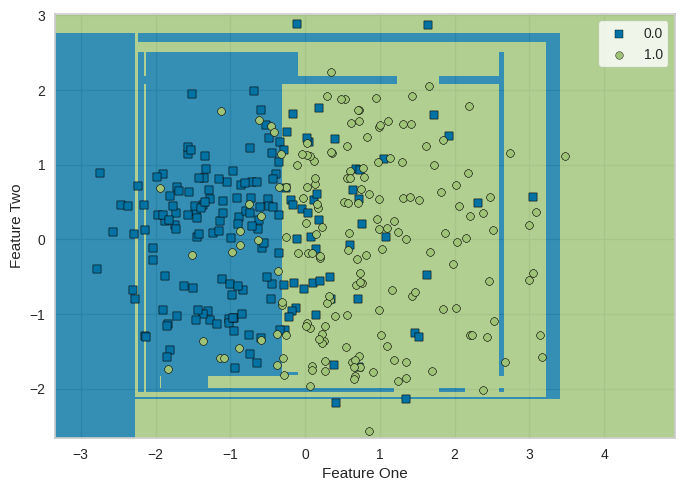

In [ ]:
## make a boundary plot
#plot_model(best, 'boundary')

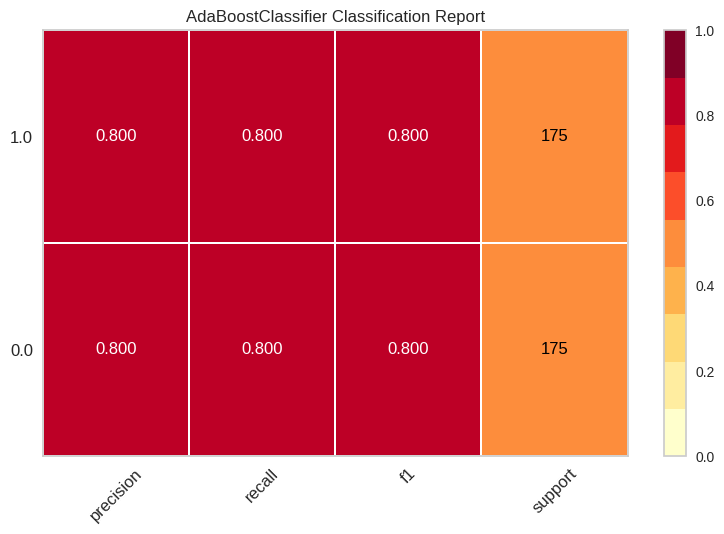

In [ ]:
#plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
#holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8000,0.8572,0.8000,0.8000,0.8000,0.6000,0.6000


In [ ]:
## For future reference
#df2_1 = df2[df2['Age_Group'] == 1]
#df2_2 = df2[df2['Age_Group'] == 2]
#df2_5 = df2[df2['Age_Group'] == 5]
#df2_6 = df2[df2['Age_Group'] == 6]


In [ ]:
## Repeat for race -cat 1 and race cat 3

In [ ]:
#from pycaret.classification import *
#s = setup(data =data_racecat_1_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,8496
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(8384, 6)"
4,Transformed data shape,"(8384, 6)"
5,Transformed train set shape,"(5868, 6)"
6,Transformed test set shape,"(2516, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7301,0.7954,0.7751,0.7113,0.7417,0.4601,0.4622,0.5890
ada,Ada Boost Classifier,0.7258,0.7940,0.7403,0.7197,0.7297,0.4516,0.4520,0.3610
lr,Logistic Regression,0.7227,0.7944,0.7243,0.7222,0.7230,0.4455,0.4457,0.5910
ridge,Ridge Classifier,0.7226,0.0000,0.7314,0.7188,0.7249,0.4451,0.4454,0.0300
lda,Linear Discriminant Analysis,0.7226,0.7894,0.7314,0.7188,0.7249,0.4451,0.4454,0.0340
lightgbm,Light Gradient Boosting Machine,0.7181,0.7852,0.7652,0.7000,0.7309,0.4363,0.4385,0.4120
rf,Random Forest Classifier,0.7174,0.7785,0.7553,0.7027,0.7277,0.4349,0.4366,0.8100
qda,Quadratic Discriminant Analysis,0.7123,0.7802,0.6844,0.7251,0.7040,0.4247,0.4255,0.0340
et,Extra Trees Classifier,0.7115,0.7703,0.7451,0.6989,0.7210,0.4230,0.4242,0.6850
nb,Naive Bayes,0.7069,0.7791,0.6568,0.7297,0.6912,0.4138,0.4159,0.0460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

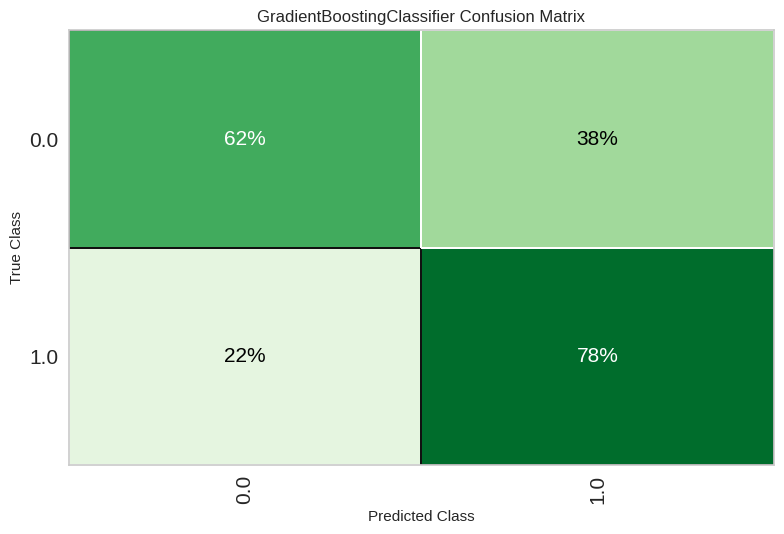

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
##plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

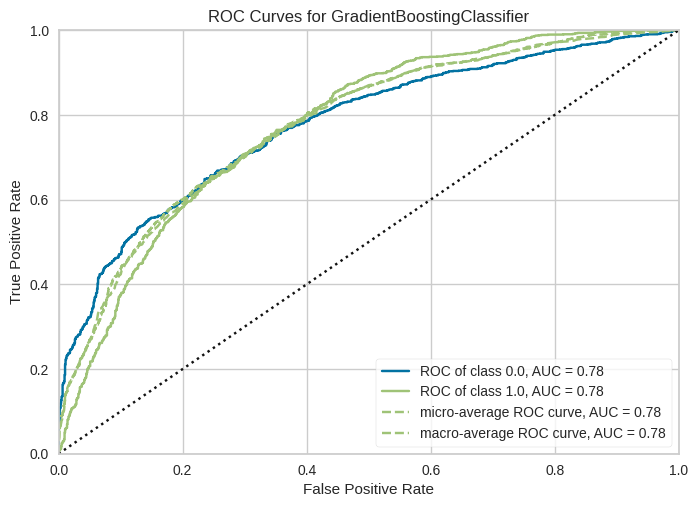

In [ ]:
# plot AUC
#plot_model(best, plot = 'auc')

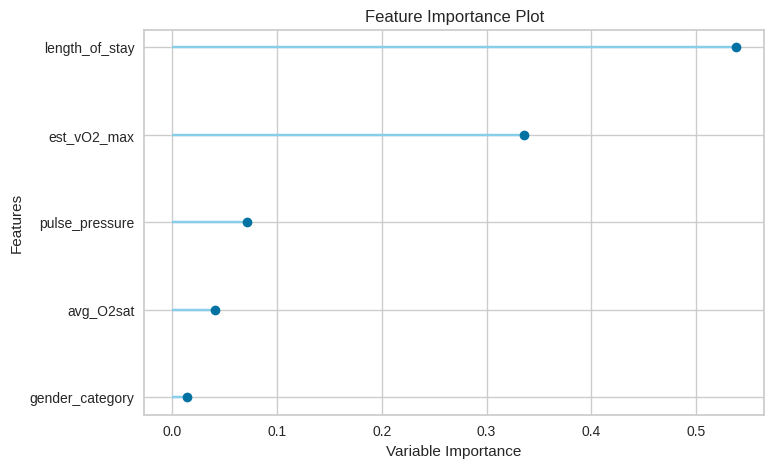

In [ ]:
# plot feature importance
#plot_model(best, plot = 'feature')

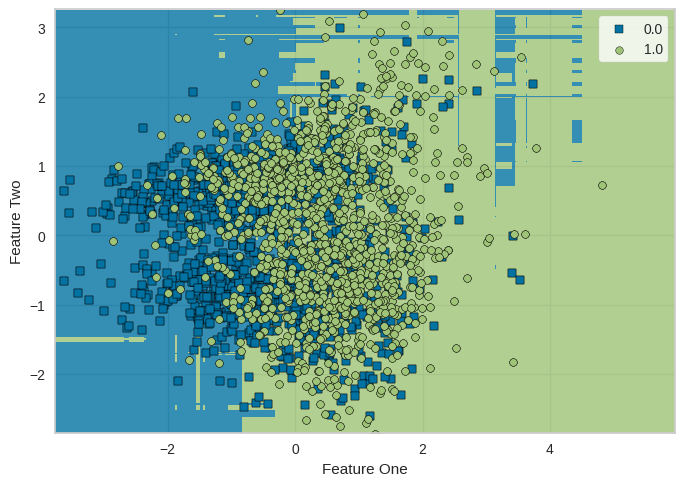

In [ ]:
# make a boundary plot
#plot_model(best, 'boundary')

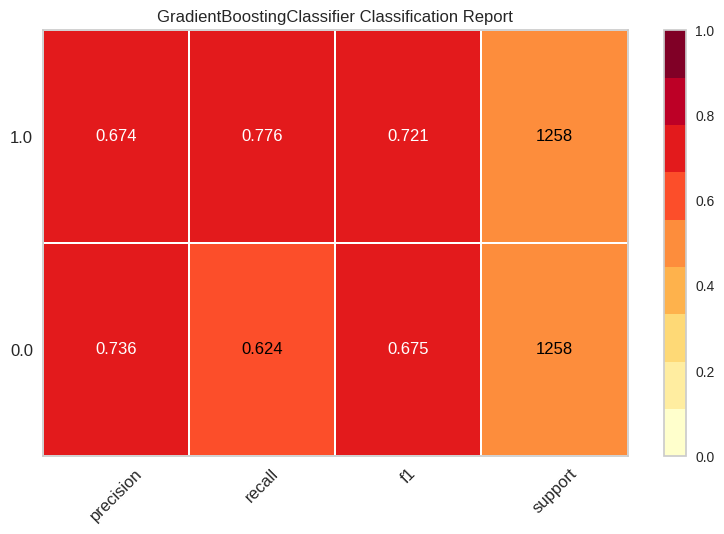

In [ ]:
#plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
#holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6999,0.7766,0.7758,0.6736,0.7211,0.3998,0.4045


In [ ]:
## Finally repeat process for race category # 3

In [ ]:
#from pycaret.classification import *
#s = setup(data =data_racecat_3_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,4887
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(218, 6)"
4,Transformed data shape,"(218, 6)"
5,Transformed train set shape,"(152, 6)"
6,Transformed test set shape,"(66, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8092,0.8500,0.7786,0.8584,0.7943,0.6205,0.6453,0.2000
lightgbm,Light Gradient Boosting Machine,0.7767,0.8348,0.7375,0.8206,0.7633,0.5538,0.5699,0.5060
et,Extra Trees Classifier,0.7696,0.8182,0.7232,0.8346,0.7515,0.5380,0.5655,0.1580
xgboost,Extreme Gradient Boosting,0.7692,0.8299,0.7375,0.7937,0.7586,0.5391,0.5471,0.0540
gbc,Gradient Boosting Classifier,0.7629,0.8326,0.7482,0.7853,0.7528,0.5246,0.5398,0.1300
lr,Logistic Regression,0.7371,0.8116,0.7500,0.7489,0.7349,0.4740,0.4919,0.0460
ada,Ada Boost Classifier,0.7304,0.7743,0.7232,0.7575,0.7184,0.4609,0.4815,0.1170
dt,Decision Tree Classifier,0.7029,0.7045,0.7125,0.7310,0.6992,0.4076,0.4320,0.0480
knn,K Neighbors Classifier,0.6979,0.7704,0.6679,0.6868,0.6536,0.3913,0.4025,0.0480
ridge,Ridge Classifier,0.6971,0.0000,0.6679,0.7187,0.6702,0.3916,0.4129,0.0410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

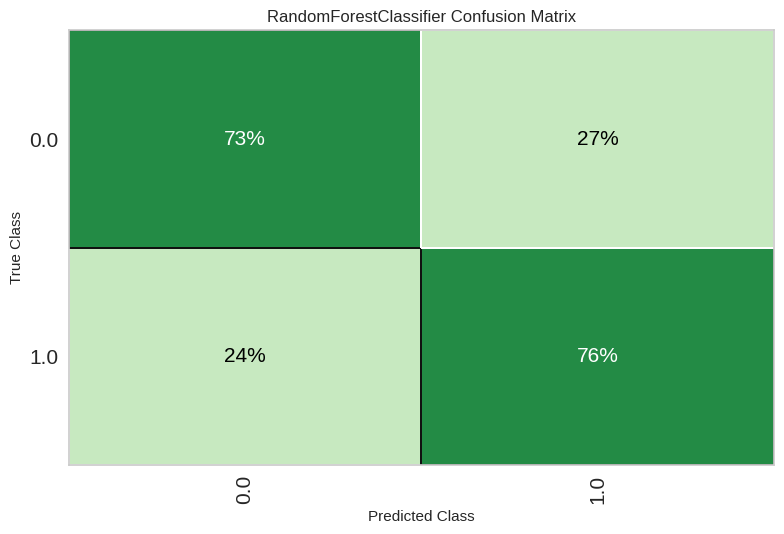

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
#plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

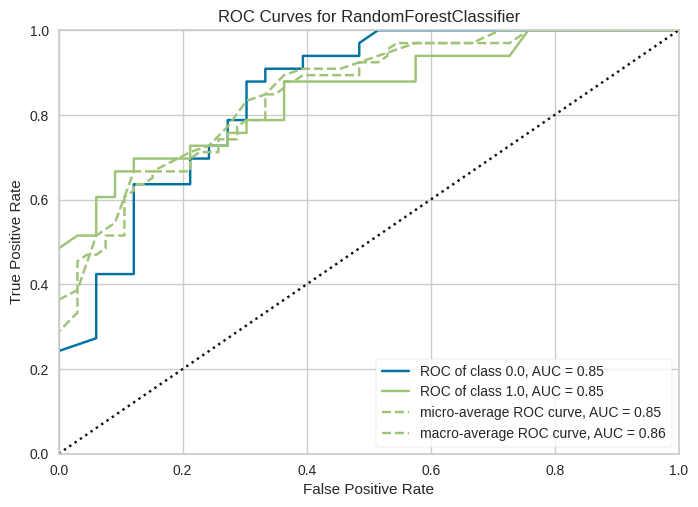

In [ ]:
# plot AUC
#plot_model(best, plot = 'auc')

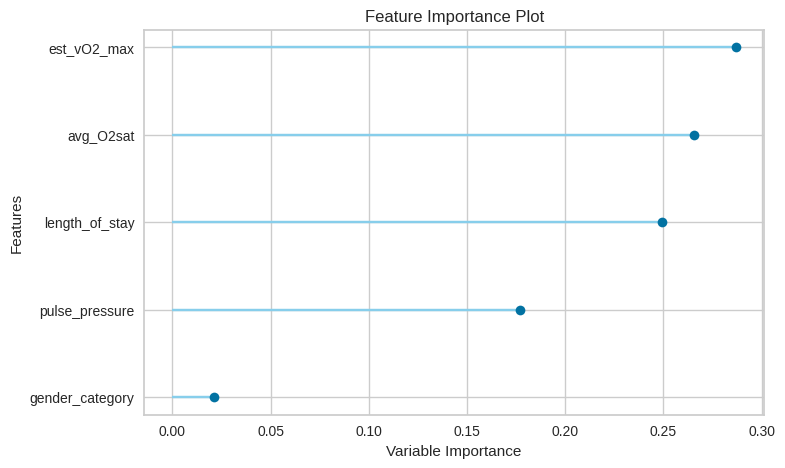

In [ ]:
# plot feature importance
#plot_model(best, plot = 'feature')

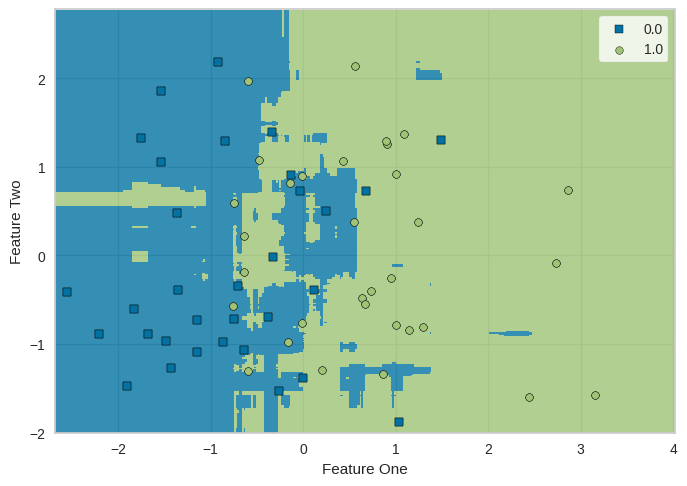

In [ ]:
# make a boundary plot
#plot_model(best, 'boundary')

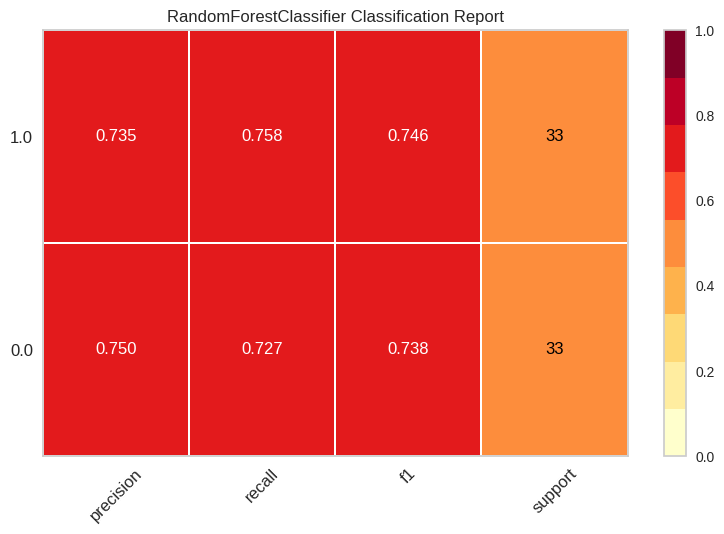

In [ ]:
#plot_model(best, plot='class_report', verbose=False)

In [ ]:
## finally let's look at the overall predictability for the stratified 60 day outpatient death set:

In [ ]:
#from pycaret.classification import *
#s = setup(data =df_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,2118
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(11660, 6)"
4,Transformed data shape,"(11660, 6)"
5,Transformed train set shape,"(8161, 6)"
6,Transformed test set shape,"(3499, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7361,0.8130,0.7757,0.7187,0.7460,0.4721,0.4739,0.7790
ada,Ada Boost Classifier,0.7342,0.8078,0.7444,0.7294,0.7367,0.4685,0.4687,0.4190
lightgbm,Light Gradient Boosting Machine,0.7308,0.8065,0.7745,0.7122,0.7420,0.4616,0.4636,0.6690
lr,Logistic Regression,0.7296,0.8037,0.7385,0.7256,0.7318,0.4591,0.4594,0.5250
lda,Linear Discriminant Analysis,0.7266,0.7995,0.7431,0.7194,0.7310,0.4533,0.4537,0.0550
ridge,Ridge Classifier,0.7265,0.0000,0.7431,0.7193,0.7309,0.4530,0.4534,0.0420
rf,Random Forest Classifier,0.7249,0.7965,0.7520,0.7134,0.7320,0.4498,0.4507,1.1810
et,Extra Trees Classifier,0.7239,0.7895,0.7547,0.7110,0.7320,0.4479,0.4490,0.7990
xgboost,Extreme Gradient Boosting,0.7203,0.7920,0.7488,0.7083,0.7279,0.4405,0.4413,0.1580
qda,Quadratic Discriminant Analysis,0.7123,0.7885,0.6897,0.7225,0.7056,0.4246,0.4252,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

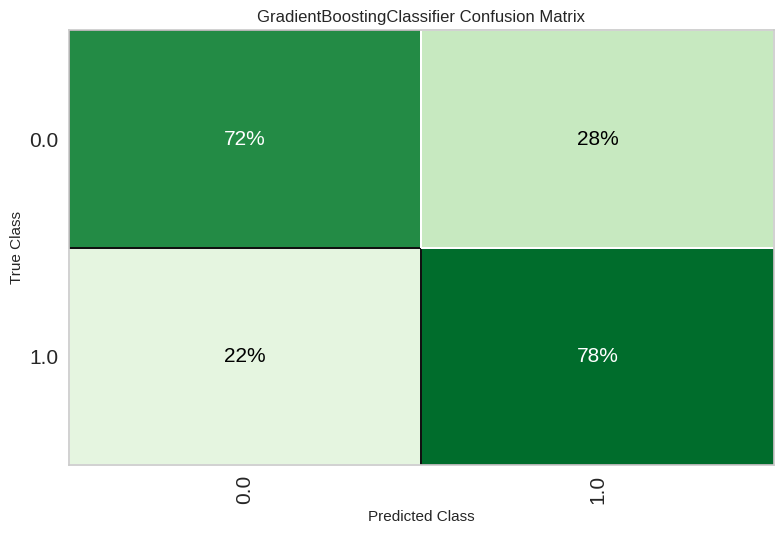

In [ ]:
# plot confusion matrix
## plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
#plot_model(best, plot = 'confusion_matrix',plot_kwargs = {'percent' : True})

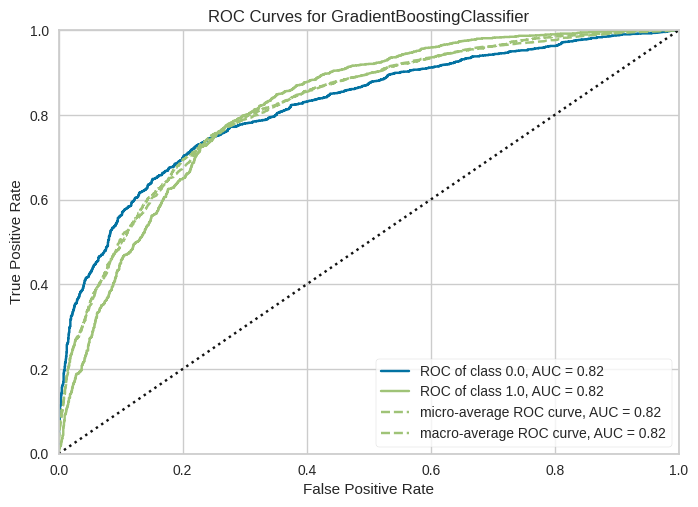

In [ ]:
# plot AUC
#plot_model(best, plot = 'auc')

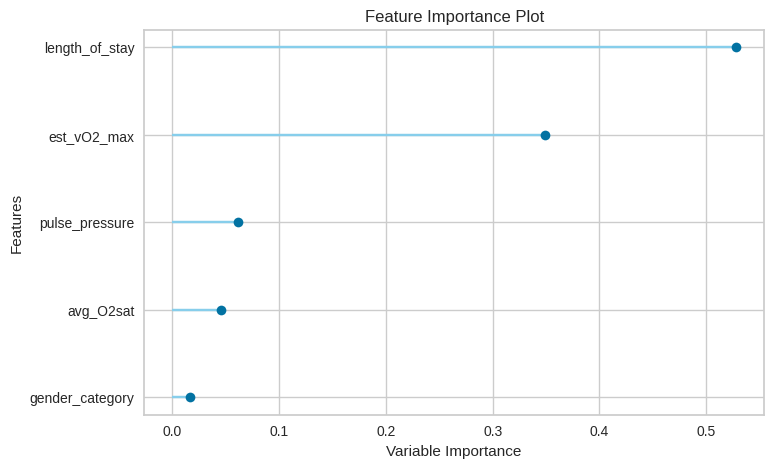

In [ ]:
# plot feature importance
#plot_model(best, plot = 'feature')

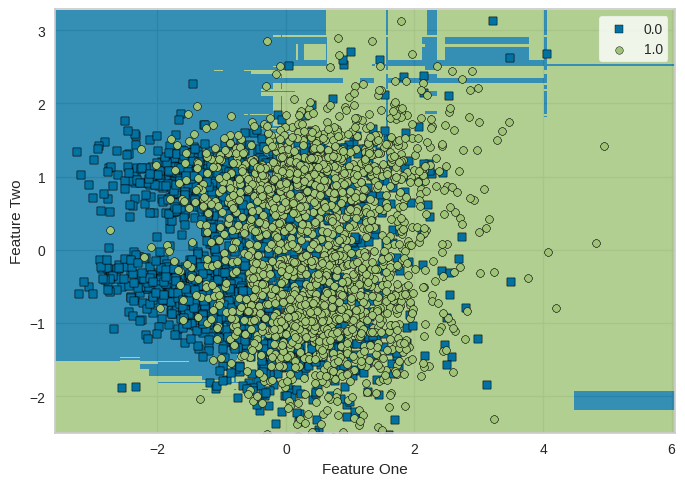

In [ ]:
# make a boundary plot
#plot_model(best, 'boundary')


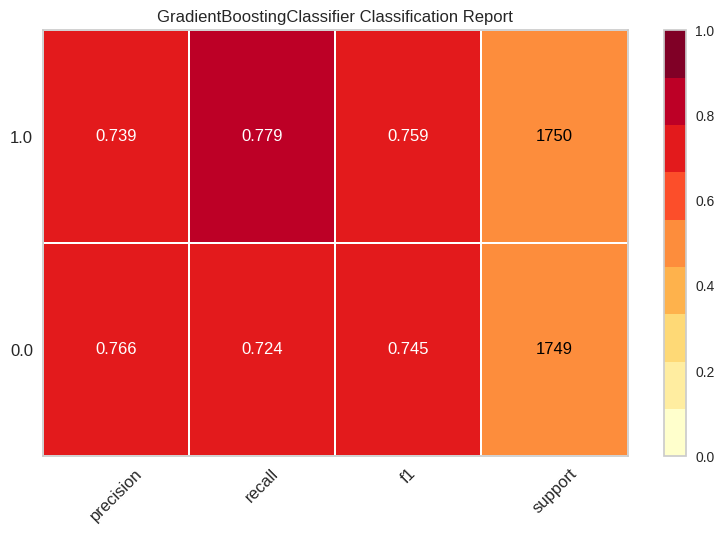

In [ ]:
#plot_model(best, plot='class_report', verbose=False)

In [ ]:
# predict on test set
#holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7519,0.8187,0.7794,0.7389,0.7586,0.5039,0.5046


In [ ]:
## Model for race category 2 is most accurate

NOW RE RUN WITH BMI DATASET (DF2)

In [213]:
## Now look at same 60 day deaths in BMI file
data2_racecat_2_strat_60 =df2_racecat_2_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat','avg_BMI', 'outpatient_death_60']]
data2_racecat_1_strat_60 =df2_racecat_1_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat', 'avg_BMI', 'outpatient_death_60']]
data2_strat_60 =df2_strat_60[['est_vO2_max','length_of_stay','gender_category','pulse_pressure','avg_O2sat','avg_BMI', 'outpatient_death_60']]

In [247]:
from pycaret.classification import *
s = setup(data =data2_racecat_2_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,6022
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(996, 7)"
4,Transformed data shape,"(996, 7)"
5,Transformed train set shape,"(697, 7)"
6,Transformed test set shape,"(299, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [248]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7948,0.8606,0.8071,0.7924,0.7970,0.5894,0.5937,0.2080
ridge,Ridge Classifier,0.7820,0.0000,0.8071,0.7732,0.7868,0.5636,0.5688,0.0460
lda,Linear Discriminant Analysis,0.7820,0.8586,0.8071,0.7732,0.7868,0.5636,0.5688,0.0370
lr,Logistic Regression,0.7777,0.8629,0.7956,0.7716,0.7805,0.5551,0.5603,0.5420
ada,Ada Boost Classifier,0.7733,0.8435,0.7755,0.7758,0.7740,0.5463,0.5486,0.1520
lightgbm,Light Gradient Boosting Machine,0.7704,0.8415,0.7898,0.7631,0.7736,0.5406,0.5453,0.2670
xgboost,Extreme Gradient Boosting,0.7689,0.8397,0.7840,0.7639,0.7713,0.5375,0.5414,0.1560
nb,Naive Bayes,0.7648,0.8476,0.7065,0.8013,0.7478,0.5291,0.5359,0.0370
et,Extra Trees Classifier,0.7632,0.8363,0.7955,0.7484,0.7693,0.5262,0.5305,0.2040
rf,Random Forest Classifier,0.7618,0.8410,0.7784,0.7551,0.7652,0.5234,0.5258,0.3550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

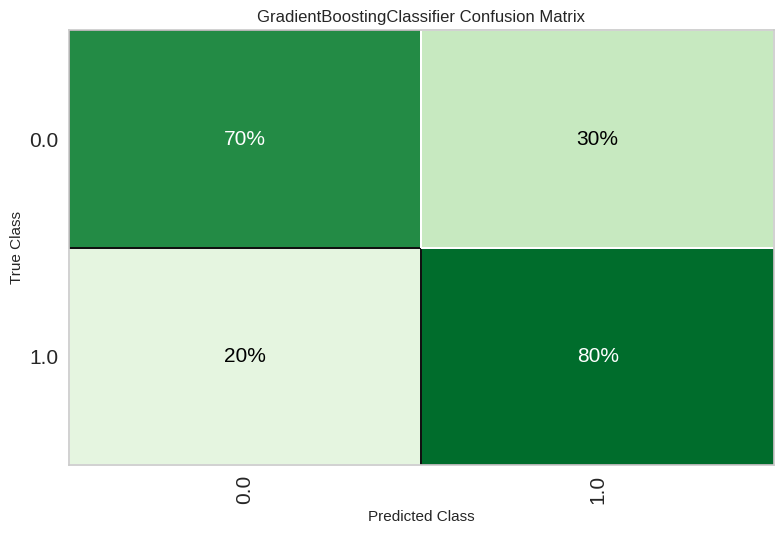

In [250]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})


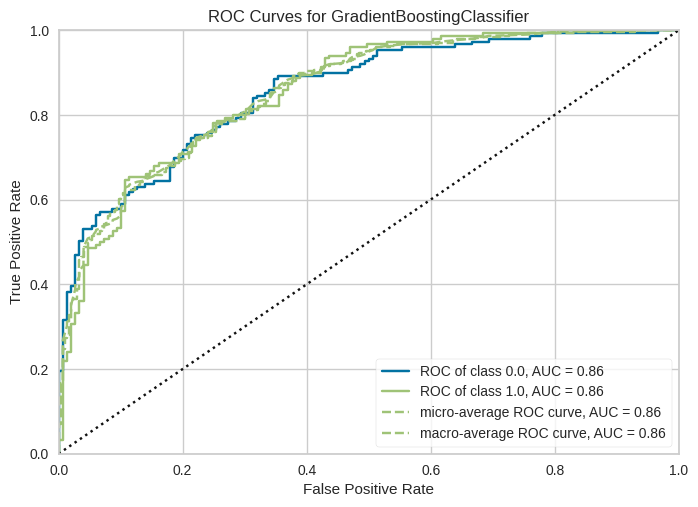

In [251]:
# plot AUC
plot_model(best, plot = 'auc')

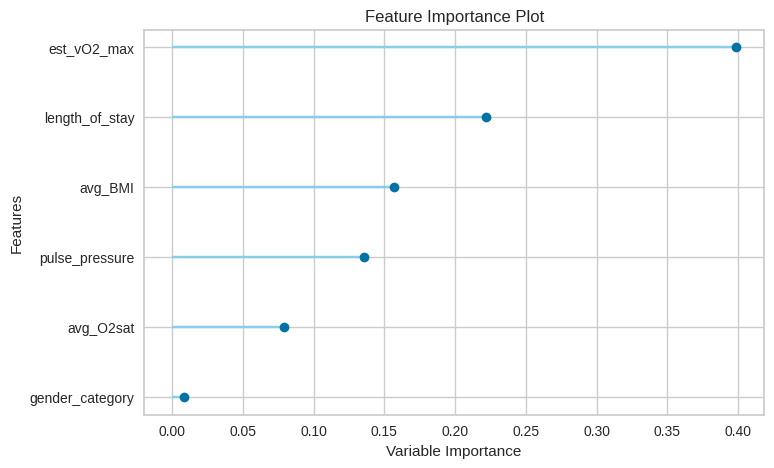

In [252]:
# plot feature importance
plot_model(best, plot = 'feature')

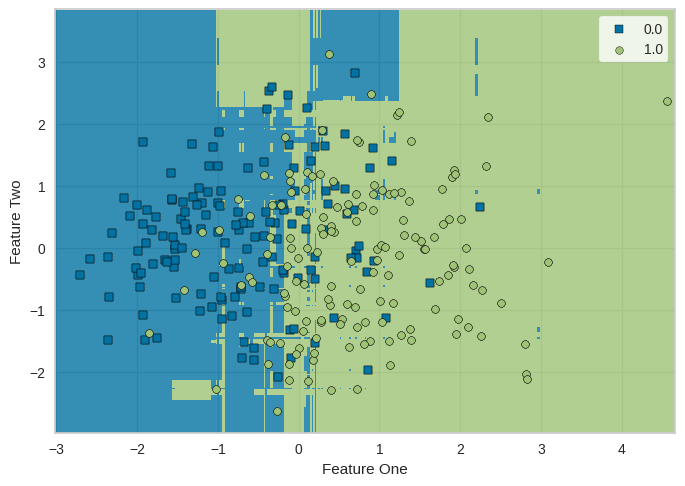

In [253]:
# make a boundary plot
plot_model(best, 'boundary')

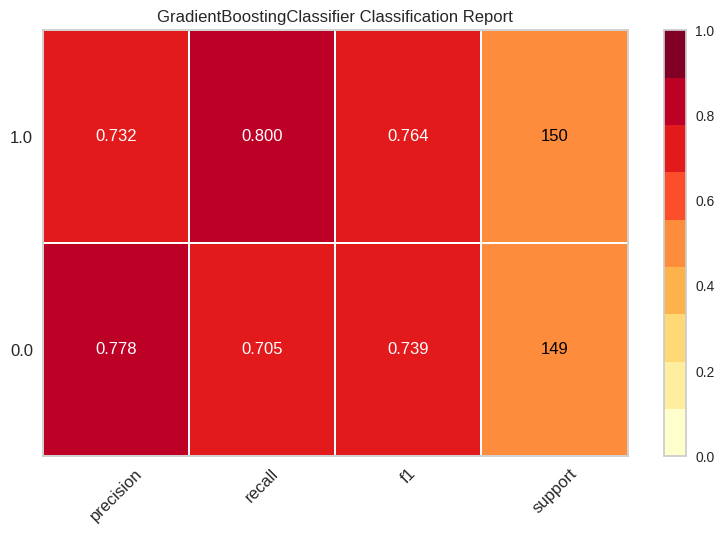

In [254]:
plot_model(best, plot='class_report', verbose=False)

In [255]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7525,0.8554,0.8000,0.7317,0.7643,0.5049,0.5071


In [256]:
#from pycaret.classification import *
s = setup(data =data2_racecat_1_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,5339
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(6542, 7)"
4,Transformed data shape,"(6542, 7)"
5,Transformed train set shape,"(4579, 7)"
6,Transformed test set shape,"(1963, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [257]:
# compare baseline models
best = compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7124,0.7786,0.7555,0.6961,0.7241,0.4247,0.4269,0.7610
rf,Random Forest Classifier,0.7076,0.7632,0.7410,0.6949,0.7169,0.4151,0.4165,0.8740
lr,Logistic Regression,0.7047,0.7756,0.7083,0.7036,0.7057,0.4095,0.4098,0.0680
et,Extra Trees Classifier,0.7041,0.7631,0.7402,0.6907,0.7143,0.4081,0.4097,0.5040
ridge,Ridge Classifier,0.7039,0.0000,0.7131,0.7004,0.7066,0.4077,0.4080,0.0350
lda,Linear Discriminant Analysis,0.7039,0.7722,0.7131,0.7004,0.7066,0.4077,0.4080,0.0400
ada,Ada Boost Classifier,0.7034,0.7691,0.7131,0.6999,0.7059,0.4068,0.4075,0.2500
lightgbm,Light Gradient Boosting Machine,0.7017,0.7618,0.7463,0.6854,0.7143,0.4033,0.4053,0.6760
qda,Quadratic Discriminant Analysis,0.6962,0.7602,0.7000,0.6949,0.6970,0.3924,0.3929,0.0370
nb,Naive Bayes,0.6945,0.7593,0.6681,0.7058,0.6862,0.3889,0.3898,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

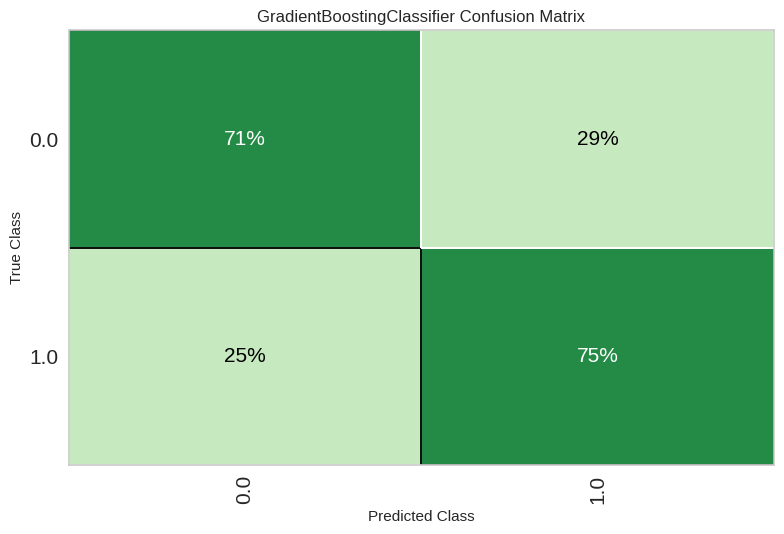

In [258]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})


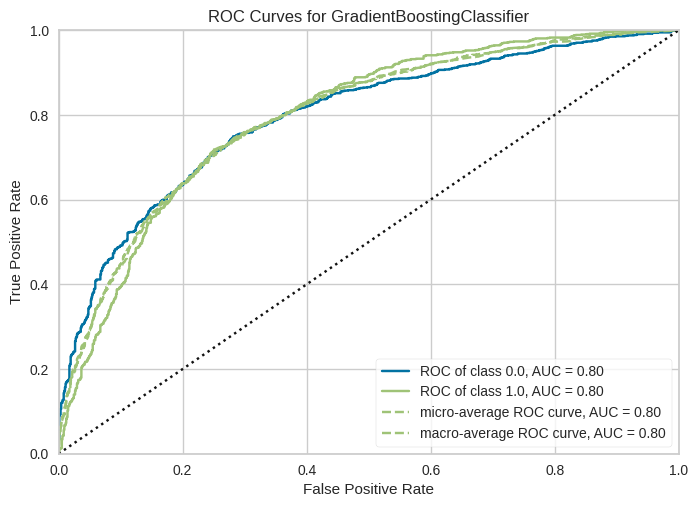

In [259]:
# plot AUC
plot_model(best, plot = 'auc')

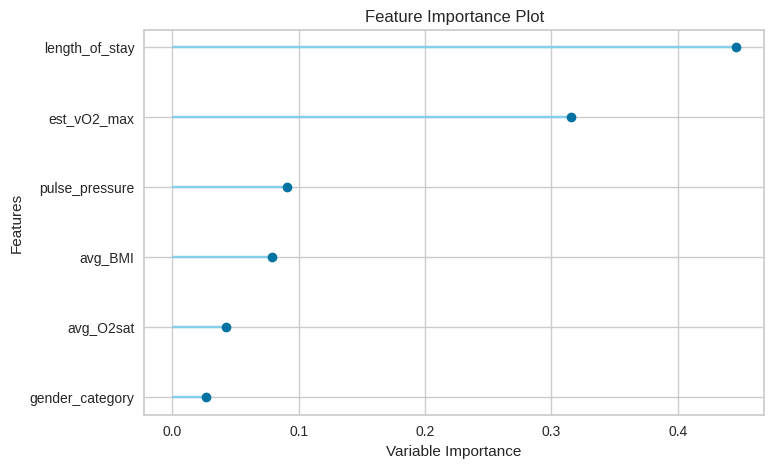

In [260]:
# plot feature importance
plot_model(best, plot = 'feature')

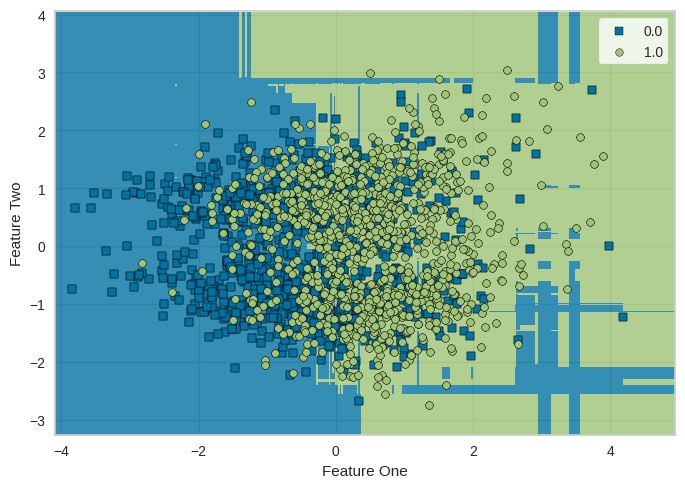

In [261]:
# make a boundary plot
plot_model(best, 'boundary')

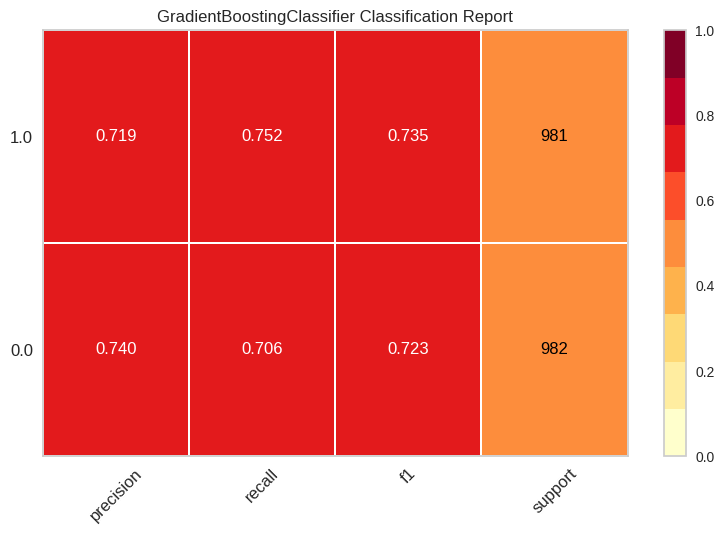

In [262]:
plot_model(best, plot='class_report', verbose=False)

In [263]:
# predict on test set
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7290,0.7955,0.7523,0.7186,0.7351,0.4580,0.4585


In [239]:
from pycaret.classification import *
s = setup(data =data2_strat_60, target = 'outpatient_death_60')

,Description,Value
0,Session id,340
1,Target,outpatient_death_60
2,Target type,Binary
3,Original data shape,"(9162, 7)"
4,Transformed data shape,"(9162, 7)"
5,Transformed train set shape,"(6413, 7)"
6,Transformed test set shape,"(2749, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [240]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7440,0.8131,0.7842,0.7263,0.7540,0.4879,0.4898,1.0380
lightgbm,Light Gradient Boosting Machine,0.7340,0.8043,0.7764,0.7161,0.7449,0.4680,0.4698,0.3550
lr,Logistic Regression,0.7337,0.7990,0.7381,0.7324,0.7349,0.4673,0.4678,0.0790
rf,Random Forest Classifier,0.7337,0.8036,0.7640,0.7208,0.7415,0.4673,0.4685,1.1760
ada,Ada Boost Classifier,0.7323,0.8050,0.7371,0.7303,0.7335,0.4645,0.4648,0.4400
et,Extra Trees Classifier,0.7310,0.8013,0.7599,0.7187,0.7386,0.4620,0.4631,0.7580
ridge,Ridge Classifier,0.7302,0.0000,0.7415,0.7258,0.7333,0.4605,0.4611,0.0360
lda,Linear Discriminant Analysis,0.7302,0.7948,0.7415,0.7258,0.7333,0.4605,0.4611,0.0410
xgboost,Extreme Gradient Boosting,0.7203,0.7912,0.7456,0.7100,0.7272,0.4405,0.4412,0.1700
nb,Naive Bayes,0.7150,0.7822,0.6904,0.7265,0.7077,0.4299,0.4308,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

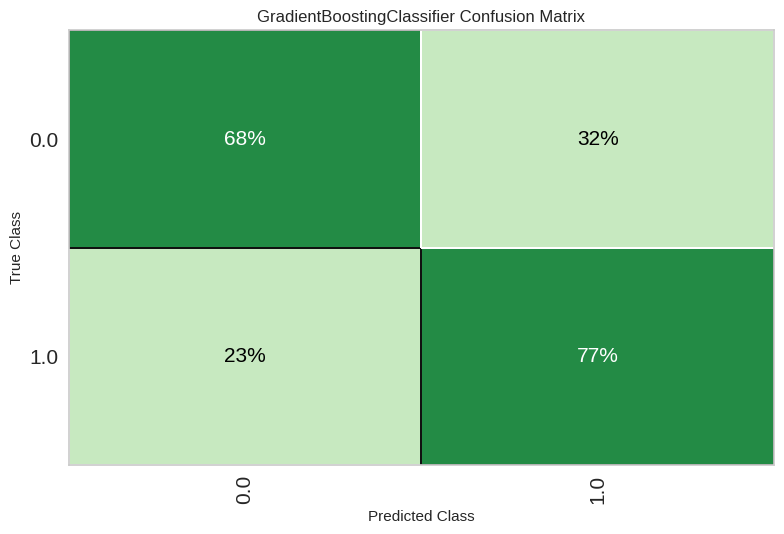

In [241]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})


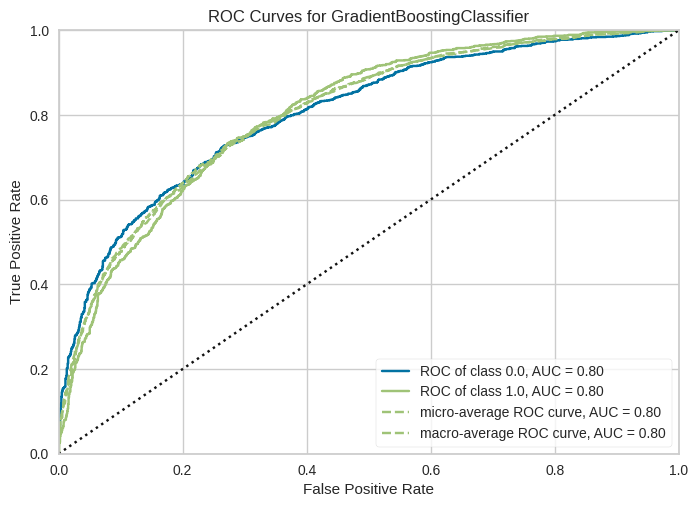

In [242]:
# plot AUC
plot_model(best, plot = 'auc')

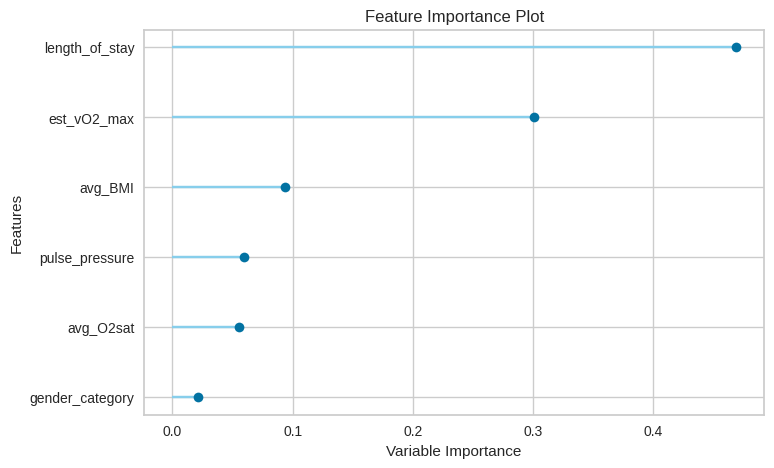

In [243]:
# plot feature importance
plot_model(best, plot = 'feature')

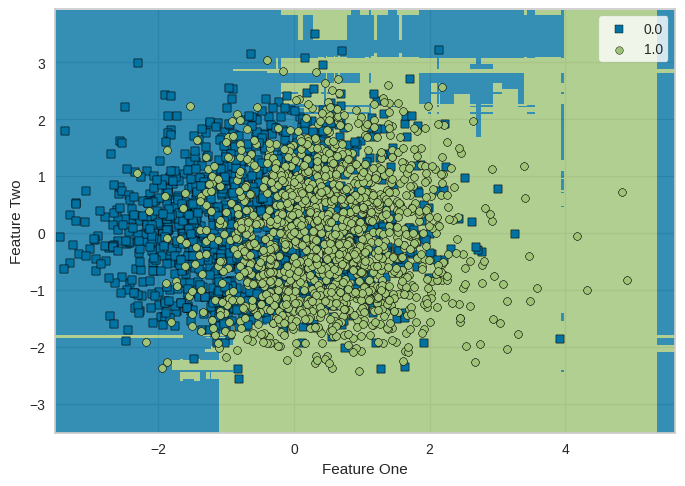

In [244]:
# make a boundary plot
plot_model(best, 'boundary')

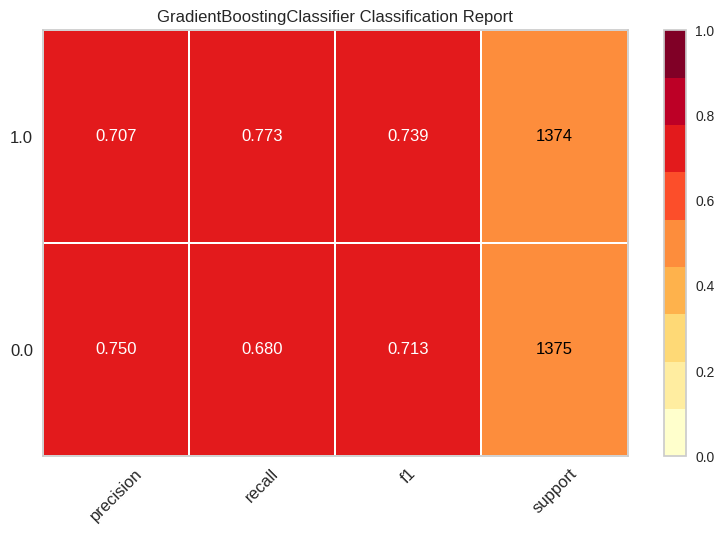

In [245]:
plot_model(best, plot='class_report', verbose=False)

In [246]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7264,0.8037,0.7729,0.7071,0.7385,0.4529,0.4549
